# Optimization Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
PlanarData4 = pd.read_csv('PlanarData4.csv', sep=',', index_col=0)
PlanarData4

x1        x2  y
0   -0.216870  1.015449  0
1    0.805050 -0.557973  1
2    0.711275 -0.410060  1
3    2.108556  0.520815  1
4    0.907466  0.459349  0
..        ...       ... ..
295  1.862773 -0.072688  1
296  1.632382 -0.513632  1
297 -0.880516  0.157830  0
298  1.608799 -0.665824  1
299  0.547726  0.348175  1

[300 rows x 3 columns]

In [3]:
X_train = PlanarData4.loc[:,['x1','x2']].values
Y_train = PlanarData4.loc[:,['y']].values

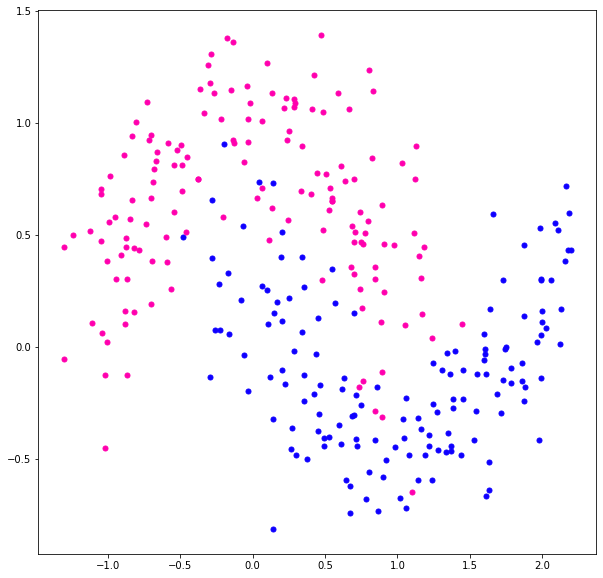

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='') 

In [5]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    threshold = params['threshold']
    f1 = tf.keras.layers.Dense(dims[1], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f2 = tf.keras.layers.Dense(dims[2], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(dims[-1], 
                               activation='sigmoid', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    x = tf.keras.Input(shape=(dims[0]))
    a1 = f1(x)
    a2 = f2(a1)
    y = f3(a2)
    model = tf.keras.Model(x, y) 
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [6]:
model = Model({'dims': [X_train.shape[1], 5, 2, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 10000, 
               'learning_rate': 0.0007,
               'batch_size': 64,
               'threshold': 0.5})

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/10000
300/300 [==============================] - 0s 1ms/sample - loss: 0.9156 - binary_accuracy: 0.5267
Epoch 2/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.9135 - binary_accuracy: 0.5300
Epoch 3/10000
300

300/300 [==============================] - 0s 35us/sample - loss: 0.8084 - binary_accuracy: 0.5267
Epoch 66/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.8071 - binary_accuracy: 0.5267
Epoch 67/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.8058 - binary_accuracy: 0.5300
Epoch 68/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.8045 - binary_accuracy: 0.5300
Epoch 69/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.8032 - binary_accuracy: 0.5300
Epoch 70/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.8019 - binary_accuracy: 0.5300
Epoch 71/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.8007 - binary_accuracy: 0.5300
Epoch 72/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.7994 - binary_accuracy: 0.5300
Epoch 73/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.7981 - binary_accura

300/300 [==============================] - 0s 25us/sample - loss: 0.7343 - binary_accuracy: 0.5400
Epoch 137/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.7335 - binary_accuracy: 0.5367
Epoch 138/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.7326 - binary_accuracy: 0.5367
Epoch 139/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.7318 - binary_accuracy: 0.5367
Epoch 140/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.7310 - binary_accuracy: 0.5367
Epoch 141/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.7302 - binary_accuracy: 0.5333
Epoch 142/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.7294 - binary_accuracy: 0.5333
Epoch 143/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.7286 - binary_accuracy: 0.5333
Epoch 144/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.7277 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.6834 - binary_accuracy: 0.5433
Epoch 208/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.6828 - binary_accuracy: 0.5433
Epoch 209/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.6822 - binary_accuracy: 0.5433
Epoch 210/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.6816 - binary_accuracy: 0.5433
Epoch 211/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.6810 - binary_accuracy: 0.5433
Epoch 212/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.6804 - binary_accuracy: 0.5433
Epoch 213/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.6798 - binary_accuracy: 0.5433
Epoch 214/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.6792 - binary_accuracy: 0.5433
Epoch 215/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.6786 - binar

300/300 [==============================] - 0s 23us/sample - loss: 0.6464 - binary_accuracy: 0.5667
Epoch 279/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.6460 - binary_accuracy: 0.5700
Epoch 280/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.6455 - binary_accuracy: 0.5700
Epoch 281/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.6451 - binary_accuracy: 0.5733
Epoch 282/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.6446 - binary_accuracy: 0.5733
Epoch 283/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.6442 - binary_accuracy: 0.5733
Epoch 284/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.6437 - binary_accuracy: 0.5733
Epoch 285/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.6433 - binary_accuracy: 0.5767
Epoch 286/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.6429 - binar

300/300 [==============================] - 0s 26us/sample - loss: 0.6178 - binary_accuracy: 0.6067
Epoch 350/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.6174 - binary_accuracy: 0.6067
Epoch 351/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.6171 - binary_accuracy: 0.6067
Epoch 352/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.6167 - binary_accuracy: 0.6067
Epoch 353/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.6164 - binary_accuracy: 0.6067
Epoch 354/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.6160 - binary_accuracy: 0.6067
Epoch 355/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.6157 - binary_accuracy: 0.6067
Epoch 356/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.6154 - binary_accuracy: 0.6100
Epoch 357/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.6150 - binar

300/300 [==============================] - 0s 24us/sample - loss: 0.5968 - binary_accuracy: 0.6267
Epoch 421/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.5966 - binary_accuracy: 0.6267
Epoch 422/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5963 - binary_accuracy: 0.6267
Epoch 423/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5960 - binary_accuracy: 0.6267
Epoch 424/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5958 - binary_accuracy: 0.6300
Epoch 425/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5955 - binary_accuracy: 0.6300
Epoch 426/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.5952 - binary_accuracy: 0.6333
Epoch 427/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5950 - binary_accuracy: 0.6333
Epoch 428/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5947 - binar

300/300 [==============================] - 0s 25us/sample - loss: 0.5790 - binary_accuracy: 0.6833
Epoch 492/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5788 - binary_accuracy: 0.6833
Epoch 493/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5785 - binary_accuracy: 0.6833
Epoch 494/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5783 - binary_accuracy: 0.6833
Epoch 495/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.5781 - binary_accuracy: 0.6867
Epoch 496/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5778 - binary_accuracy: 0.6867
Epoch 497/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5776 - binary_accuracy: 0.6867
Epoch 498/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5774 - binary_accuracy: 0.6867
Epoch 499/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.5771 - binar

300/300 [==============================] - 0s 27us/sample - loss: 0.5637 - binary_accuracy: 0.7233
Epoch 563/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5636 - binary_accuracy: 0.7233
Epoch 564/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5634 - binary_accuracy: 0.7267
Epoch 565/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.5632 - binary_accuracy: 0.7267
Epoch 566/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5630 - binary_accuracy: 0.7267
Epoch 567/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.5628 - binary_accuracy: 0.7267
Epoch 568/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5626 - binary_accuracy: 0.7300
Epoch 569/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5624 - binary_accuracy: 0.7300
Epoch 570/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5622 - binar

300/300 [==============================] - 0s 26us/sample - loss: 0.5513 - binary_accuracy: 0.7400
Epoch 634/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5511 - binary_accuracy: 0.7400
Epoch 635/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5510 - binary_accuracy: 0.7400
Epoch 636/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5508 - binary_accuracy: 0.7400
Epoch 637/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5507 - binary_accuracy: 0.7400
Epoch 638/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5505 - binary_accuracy: 0.7400
Epoch 639/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5504 - binary_accuracy: 0.7433
Epoch 640/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5502 - binary_accuracy: 0.7433
Epoch 641/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5501 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.5413 - binary_accuracy: 0.7567
Epoch 705/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.5412 - binary_accuracy: 0.7567
Epoch 706/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5411 - binary_accuracy: 0.7567
Epoch 707/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5409 - binary_accuracy: 0.7567
Epoch 708/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.5408 - binary_accuracy: 0.7567
Epoch 709/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.5407 - binary_accuracy: 0.7567
Epoch 710/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5405 - binary_accuracy: 0.7567
Epoch 711/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5404 - binary_accuracy: 0.7567
Epoch 712/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5403 - binar

300/300 [==============================] - 0s 24us/sample - loss: 0.5331 - binary_accuracy: 0.7667
Epoch 776/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.5330 - binary_accuracy: 0.7667
Epoch 777/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5329 - binary_accuracy: 0.7667
Epoch 778/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5328 - binary_accuracy: 0.7667
Epoch 779/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5327 - binary_accuracy: 0.7667
Epoch 780/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5326 - binary_accuracy: 0.7667
Epoch 781/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5325 - binary_accuracy: 0.7667
Epoch 782/10000
300/300 [==============================] - 0s 20us/sample - loss: 0.5324 - binary_accuracy: 0.7667
Epoch 783/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5323 - binar

300/300 [==============================] - 0s 24us/sample - loss: 0.5261 - binary_accuracy: 0.7733
Epoch 847/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5260 - binary_accuracy: 0.7733
Epoch 848/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5259 - binary_accuracy: 0.7733
Epoch 849/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5258 - binary_accuracy: 0.7733
Epoch 850/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5257 - binary_accuracy: 0.7733
Epoch 851/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5256 - binary_accuracy: 0.7733
Epoch 852/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5255 - binary_accuracy: 0.7733
Epoch 853/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5254 - binary_accuracy: 0.7733
Epoch 854/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5253 - binar

300/300 [==============================] - 0s 31us/sample - loss: 0.5197 - binary_accuracy: 0.7800
Epoch 918/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5196 - binary_accuracy: 0.7833
Epoch 919/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5195 - binary_accuracy: 0.7833
Epoch 920/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5194 - binary_accuracy: 0.7833
Epoch 921/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.5193 - binary_accuracy: 0.7833
Epoch 922/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5192 - binary_accuracy: 0.7833
Epoch 923/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.5192 - binary_accuracy: 0.7833
Epoch 924/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.5191 - binary_accuracy: 0.7833
Epoch 925/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.5190 - binar

300/300 [==============================] - 0s 23us/sample - loss: 0.5138 - binary_accuracy: 0.7833
Epoch 989/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5137 - binary_accuracy: 0.7833
Epoch 990/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5137 - binary_accuracy: 0.7833
Epoch 991/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5136 - binary_accuracy: 0.7833
Epoch 992/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.5135 - binary_accuracy: 0.7833
Epoch 993/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5134 - binary_accuracy: 0.7833
Epoch 994/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5133 - binary_accuracy: 0.7833
Epoch 995/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5133 - binary_accuracy: 0.7833
Epoch 996/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.5132 - binar

300/300 [==============================] - 0s 22us/sample - loss: 0.5084 - binary_accuracy: 0.7867
Epoch 1059/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5083 - binary_accuracy: 0.7867
Epoch 1060/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5082 - binary_accuracy: 0.7867
Epoch 1061/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.5081 - binary_accuracy: 0.7867
Epoch 1062/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.5080 - binary_accuracy: 0.7867
Epoch 1063/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.5080 - binary_accuracy: 0.7867
Epoch 1064/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5079 - binary_accuracy: 0.7867
Epoch 1065/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5078 - binary_accuracy: 0.7867
Epoch 1066/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.5077

300/300 [==============================] - 0s 24us/sample - loss: 0.5033 - binary_accuracy: 0.7933
Epoch 1129/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.5032 - binary_accuracy: 0.7933
Epoch 1130/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5031 - binary_accuracy: 0.7933
Epoch 1131/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.5030 - binary_accuracy: 0.7933
Epoch 1132/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5030 - binary_accuracy: 0.7933
Epoch 1133/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.5029 - binary_accuracy: 0.7933
Epoch 1134/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.5028 - binary_accuracy: 0.7933
Epoch 1135/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.5028 - binary_accuracy: 0.7933
Epoch 1136/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.5027

300/300 [==============================] - 0s 22us/sample - loss: 0.4985 - binary_accuracy: 0.7967
Epoch 1199/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4984 - binary_accuracy: 0.7967
Epoch 1200/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4984 - binary_accuracy: 0.7967
Epoch 1201/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4983 - binary_accuracy: 0.7967
Epoch 1202/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4982 - binary_accuracy: 0.7933
Epoch 1203/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4982 - binary_accuracy: 0.7967
Epoch 1204/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4981 - binary_accuracy: 0.7967
Epoch 1205/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4980 - binary_accuracy: 0.7967
Epoch 1206/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4980

300/300 [==============================] - 0s 29us/sample - loss: 0.4941 - binary_accuracy: 0.7967
Epoch 1269/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.4940 - binary_accuracy: 0.7967
Epoch 1270/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4939 - binary_accuracy: 0.7967
Epoch 1271/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4939 - binary_accuracy: 0.7967
Epoch 1272/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4938 - binary_accuracy: 0.7967
Epoch 1273/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4938 - binary_accuracy: 0.7967
Epoch 1274/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4937 - binary_accuracy: 0.7967
Epoch 1275/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4936 - binary_accuracy: 0.7967
Epoch 1276/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4936

300/300 [==============================] - 0s 22us/sample - loss: 0.4899 - binary_accuracy: 0.7967
Epoch 1339/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4898 - binary_accuracy: 0.7967
Epoch 1340/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4897 - binary_accuracy: 0.7967
Epoch 1341/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4897 - binary_accuracy: 0.7967
Epoch 1342/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4896 - binary_accuracy: 0.7967
Epoch 1343/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4896 - binary_accuracy: 0.7967
Epoch 1344/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.4895 - binary_accuracy: 0.7967
Epoch 1345/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.4895 - binary_accuracy: 0.7967
Epoch 1346/10000
300/300 [==============================] - 0s 44us/sample - loss: 0.4894

300/300 [==============================] - 0s 29us/sample - loss: 0.4858 - binary_accuracy: 0.8033
Epoch 1409/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4858 - binary_accuracy: 0.8033
Epoch 1410/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4857 - binary_accuracy: 0.8033
Epoch 1411/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4857 - binary_accuracy: 0.8033
Epoch 1412/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4856 - binary_accuracy: 0.8033
Epoch 1413/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4856 - binary_accuracy: 0.8033
Epoch 1414/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4855 - binary_accuracy: 0.8033
Epoch 1415/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4854 - binary_accuracy: 0.8033
Epoch 1416/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4854

300/300 [==============================] - 0s 32us/sample - loss: 0.4820 - binary_accuracy: 0.8033
Epoch 1479/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4819 - binary_accuracy: 0.8033
Epoch 1480/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.4818 - binary_accuracy: 0.8033
Epoch 1481/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.4818 - binary_accuracy: 0.8033
Epoch 1482/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.4817 - binary_accuracy: 0.8033
Epoch 1483/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4817 - binary_accuracy: 0.8033
Epoch 1484/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.4816 - binary_accuracy: 0.8033
Epoch 1485/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4815 - binary_accuracy: 0.8033
Epoch 1486/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.4815

300/300 [==============================] - 0s 30us/sample - loss: 0.4781 - binary_accuracy: 0.8033
Epoch 1549/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4780 - binary_accuracy: 0.8033
Epoch 1550/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4780 - binary_accuracy: 0.8033
Epoch 1551/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4779 - binary_accuracy: 0.8033
Epoch 1552/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4779 - binary_accuracy: 0.8033
Epoch 1553/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.4778 - binary_accuracy: 0.8033
Epoch 1554/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4778 - binary_accuracy: 0.8033
Epoch 1555/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4777 - binary_accuracy: 0.8033
Epoch 1556/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4777

300/300 [==============================] - 0s 34us/sample - loss: 0.4744 - binary_accuracy: 0.8067
Epoch 1619/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4744 - binary_accuracy: 0.8067
Epoch 1620/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4743 - binary_accuracy: 0.8067
Epoch 1621/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4743 - binary_accuracy: 0.8067
Epoch 1622/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4742 - binary_accuracy: 0.8067
Epoch 1623/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4742 - binary_accuracy: 0.8067
Epoch 1624/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4741 - binary_accuracy: 0.8067
Epoch 1625/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4741 - binary_accuracy: 0.8067
Epoch 1626/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4740

300/300 [==============================] - 0s 27us/sample - loss: 0.4708 - binary_accuracy: 0.8067
Epoch 1689/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4707 - binary_accuracy: 0.8067
Epoch 1690/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4707 - binary_accuracy: 0.8067
Epoch 1691/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4706 - binary_accuracy: 0.8067
Epoch 1692/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4706 - binary_accuracy: 0.8067
Epoch 1693/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4705 - binary_accuracy: 0.8067
Epoch 1694/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4705 - binary_accuracy: 0.8067
Epoch 1695/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4704 - binary_accuracy: 0.8067
Epoch 1696/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.4704

300/300 [==============================] - 0s 24us/sample - loss: 0.4673 - binary_accuracy: 0.8100
Epoch 1759/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4672 - binary_accuracy: 0.8100
Epoch 1760/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4672 - binary_accuracy: 0.8100
Epoch 1761/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4671 - binary_accuracy: 0.8100
Epoch 1762/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4671 - binary_accuracy: 0.8100
Epoch 1763/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.4670 - binary_accuracy: 0.8100
Epoch 1764/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4670 - binary_accuracy: 0.8100
Epoch 1765/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.4669 - binary_accuracy: 0.8100
Epoch 1766/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4669

300/300 [==============================] - 0s 24us/sample - loss: 0.4638 - binary_accuracy: 0.8133
Epoch 1829/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4638 - binary_accuracy: 0.8133
Epoch 1830/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4637 - binary_accuracy: 0.8133
Epoch 1831/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4637 - binary_accuracy: 0.8133
Epoch 1832/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4636 - binary_accuracy: 0.8133
Epoch 1833/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4636 - binary_accuracy: 0.8133
Epoch 1834/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4635 - binary_accuracy: 0.8133
Epoch 1835/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4635 - binary_accuracy: 0.8133
Epoch 1836/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4634

300/300 [==============================] - 0s 23us/sample - loss: 0.4605 - binary_accuracy: 0.8133
Epoch 1899/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4604 - binary_accuracy: 0.8133
Epoch 1900/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4604 - binary_accuracy: 0.8133
Epoch 1901/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4603 - binary_accuracy: 0.8133
Epoch 1902/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4603 - binary_accuracy: 0.8133
Epoch 1903/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4602 - binary_accuracy: 0.8133
Epoch 1904/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4602 - binary_accuracy: 0.8133
Epoch 1905/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4602 - binary_accuracy: 0.8133
Epoch 1906/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4601

300/300 [==============================] - 0s 22us/sample - loss: 0.4572 - binary_accuracy: 0.8200
Epoch 1969/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4572 - binary_accuracy: 0.8200
Epoch 1970/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4571 - binary_accuracy: 0.8200
Epoch 1971/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4571 - binary_accuracy: 0.8200
Epoch 1972/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4570 - binary_accuracy: 0.8200
Epoch 1973/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4570 - binary_accuracy: 0.8200
Epoch 1974/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4570 - binary_accuracy: 0.8200
Epoch 1975/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4569 - binary_accuracy: 0.8200
Epoch 1976/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4569

300/300 [==============================] - 0s 30us/sample - loss: 0.4541 - binary_accuracy: 0.8200
Epoch 2039/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4540 - binary_accuracy: 0.8200
Epoch 2040/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4540 - binary_accuracy: 0.8200
Epoch 2041/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4539 - binary_accuracy: 0.8200
Epoch 2042/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4539 - binary_accuracy: 0.8200
Epoch 2043/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4538 - binary_accuracy: 0.8200
Epoch 2044/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4538 - binary_accuracy: 0.8200
Epoch 2045/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4537 - binary_accuracy: 0.8200
Epoch 2046/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4537

300/300 [==============================] - 0s 32us/sample - loss: 0.4510 - binary_accuracy: 0.8233
Epoch 2109/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4509 - binary_accuracy: 0.8233
Epoch 2110/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4509 - binary_accuracy: 0.8233
Epoch 2111/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4508 - binary_accuracy: 0.8233
Epoch 2112/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4508 - binary_accuracy: 0.8233
Epoch 2113/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4507 - binary_accuracy: 0.8233
Epoch 2114/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4507 - binary_accuracy: 0.8233
Epoch 2115/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4507 - binary_accuracy: 0.8233
Epoch 2116/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4506

300/300 [==============================] - 0s 27us/sample - loss: 0.4479 - binary_accuracy: 0.8267
Epoch 2179/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4478 - binary_accuracy: 0.8267
Epoch 2180/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4478 - binary_accuracy: 0.8267
Epoch 2181/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4477 - binary_accuracy: 0.8267
Epoch 2182/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4477 - binary_accuracy: 0.8267
Epoch 2183/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4477 - binary_accuracy: 0.8267
Epoch 2184/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4476 - binary_accuracy: 0.8267
Epoch 2185/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4476 - binary_accuracy: 0.8267
Epoch 2186/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4475

300/300 [==============================] - 0s 26us/sample - loss: 0.4449 - binary_accuracy: 0.8267
Epoch 2249/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4448 - binary_accuracy: 0.8267
Epoch 2250/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4448 - binary_accuracy: 0.8267
Epoch 2251/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4448 - binary_accuracy: 0.8267
Epoch 2252/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4447 - binary_accuracy: 0.8267
Epoch 2253/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4447 - binary_accuracy: 0.8267
Epoch 2254/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4446 - binary_accuracy: 0.8267
Epoch 2255/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4446 - binary_accuracy: 0.8267
Epoch 2256/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4445

300/300 [==============================] - 0s 27us/sample - loss: 0.4420 - binary_accuracy: 0.8267
Epoch 2319/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4419 - binary_accuracy: 0.8267
Epoch 2320/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4419 - binary_accuracy: 0.8267
Epoch 2321/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4418 - binary_accuracy: 0.8267
Epoch 2322/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4418 - binary_accuracy: 0.8267
Epoch 2323/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4418 - binary_accuracy: 0.8267
Epoch 2324/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4417 - binary_accuracy: 0.8267
Epoch 2325/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4417 - binary_accuracy: 0.8267
Epoch 2326/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4416

300/300 [==============================] - 0s 25us/sample - loss: 0.4391 - binary_accuracy: 0.8300
Epoch 2389/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4391 - binary_accuracy: 0.8300
Epoch 2390/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4390 - binary_accuracy: 0.8300
Epoch 2391/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4390 - binary_accuracy: 0.8300
Epoch 2392/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4390 - binary_accuracy: 0.8300
Epoch 2393/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4389 - binary_accuracy: 0.8300
Epoch 2394/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4389 - binary_accuracy: 0.8300
Epoch 2395/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4388 - binary_accuracy: 0.8300
Epoch 2396/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4388

300/300 [==============================] - 0s 28us/sample - loss: 0.4364 - binary_accuracy: 0.8333
Epoch 2459/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4363 - binary_accuracy: 0.8333
Epoch 2460/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4363 - binary_accuracy: 0.8300
Epoch 2461/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4362 - binary_accuracy: 0.8333
Epoch 2462/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4362 - binary_accuracy: 0.8333
Epoch 2463/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4362 - binary_accuracy: 0.8333
Epoch 2464/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4361 - binary_accuracy: 0.8333
Epoch 2465/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4361 - binary_accuracy: 0.8333
Epoch 2466/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4360

300/300 [==============================] - 0s 25us/sample - loss: 0.4336 - binary_accuracy: 0.8367
Epoch 2529/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4336 - binary_accuracy: 0.8367
Epoch 2530/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4335 - binary_accuracy: 0.8367
Epoch 2531/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4335 - binary_accuracy: 0.8367
Epoch 2532/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4335 - binary_accuracy: 0.8367
Epoch 2533/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4334 - binary_accuracy: 0.8367
Epoch 2534/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4334 - binary_accuracy: 0.8367
Epoch 2535/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4333 - binary_accuracy: 0.8367
Epoch 2536/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4333

300/300 [==============================] - 0s 28us/sample - loss: 0.4309 - binary_accuracy: 0.8367
Epoch 2599/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4308 - binary_accuracy: 0.8367
Epoch 2600/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4308 - binary_accuracy: 0.8367
Epoch 2601/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4307 - binary_accuracy: 0.8367
Epoch 2602/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4307 - binary_accuracy: 0.8367
Epoch 2603/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4307 - binary_accuracy: 0.8367
Epoch 2604/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4306 - binary_accuracy: 0.8367
Epoch 2605/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4306 - binary_accuracy: 0.8367
Epoch 2606/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4305

300/300 [==============================] - 0s 26us/sample - loss: 0.4282 - binary_accuracy: 0.8400
Epoch 2669/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4281 - binary_accuracy: 0.8400
Epoch 2670/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4281 - binary_accuracy: 0.8400
Epoch 2671/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4280 - binary_accuracy: 0.8400
Epoch 2672/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4280 - binary_accuracy: 0.8400
Epoch 2673/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4280 - binary_accuracy: 0.8400
Epoch 2674/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4279 - binary_accuracy: 0.8400
Epoch 2675/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4279 - binary_accuracy: 0.8400
Epoch 2676/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4278

300/300 [==============================] - 0s 23us/sample - loss: 0.4254 - binary_accuracy: 0.8400
Epoch 2739/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.4254 - binary_accuracy: 0.8400
Epoch 2740/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4254 - binary_accuracy: 0.8400
Epoch 2741/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4253 - binary_accuracy: 0.8400
Epoch 2742/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4253 - binary_accuracy: 0.8400
Epoch 2743/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4252 - binary_accuracy: 0.8400
Epoch 2744/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4252 - binary_accuracy: 0.8400
Epoch 2745/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4252 - binary_accuracy: 0.8400
Epoch 2746/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4251

300/300 [==============================] - 0s 23us/sample - loss: 0.4228 - binary_accuracy: 0.8400
Epoch 2809/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4227 - binary_accuracy: 0.8400
Epoch 2810/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4227 - binary_accuracy: 0.8400
Epoch 2811/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4227 - binary_accuracy: 0.8400
Epoch 2812/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4226 - binary_accuracy: 0.8400
Epoch 2813/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4226 - binary_accuracy: 0.8400
Epoch 2814/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4226 - binary_accuracy: 0.8400
Epoch 2815/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4225 - binary_accuracy: 0.8400
Epoch 2816/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4225

300/300 [==============================] - 0s 28us/sample - loss: 0.4201 - binary_accuracy: 0.8400
Epoch 2879/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.4200 - binary_accuracy: 0.8400
Epoch 2880/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4200 - binary_accuracy: 0.8400
Epoch 2881/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4200 - binary_accuracy: 0.8400
Epoch 2882/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4199 - binary_accuracy: 0.8400
Epoch 2883/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4199 - binary_accuracy: 0.8400
Epoch 2884/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4199 - binary_accuracy: 0.8400
Epoch 2885/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4198 - binary_accuracy: 0.8400
Epoch 2886/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4198

300/300 [==============================] - 0s 22us/sample - loss: 0.4173 - binary_accuracy: 0.8433
Epoch 2949/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4172 - binary_accuracy: 0.8433
Epoch 2950/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4172 - binary_accuracy: 0.8433
Epoch 2951/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4172 - binary_accuracy: 0.8433
Epoch 2952/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4171 - binary_accuracy: 0.8433
Epoch 2953/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4171 - binary_accuracy: 0.8433
Epoch 2954/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4170 - binary_accuracy: 0.8433
Epoch 2955/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4170 - binary_accuracy: 0.8433
Epoch 2956/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4169

300/300 [==============================] - 0s 30us/sample - loss: 0.4143 - binary_accuracy: 0.8433
Epoch 3019/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4143 - binary_accuracy: 0.8433
Epoch 3020/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4142 - binary_accuracy: 0.8433
Epoch 3021/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4142 - binary_accuracy: 0.8433
Epoch 3022/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4141 - binary_accuracy: 0.8433
Epoch 3023/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4141 - binary_accuracy: 0.8433
Epoch 3024/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4140 - binary_accuracy: 0.8433
Epoch 3025/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4140 - binary_accuracy: 0.8433
Epoch 3026/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4140

300/300 [==============================] - 0s 23us/sample - loss: 0.4114 - binary_accuracy: 0.8433
Epoch 3089/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4114 - binary_accuracy: 0.8433
Epoch 3090/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4114 - binary_accuracy: 0.8433
Epoch 3091/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4113 - binary_accuracy: 0.8433
Epoch 3092/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4113 - binary_accuracy: 0.8433
Epoch 3093/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4113 - binary_accuracy: 0.8433
Epoch 3094/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4112 - binary_accuracy: 0.8433
Epoch 3095/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4112 - binary_accuracy: 0.8433
Epoch 3096/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4112

300/300 [==============================] - 0s 24us/sample - loss: 0.4088 - binary_accuracy: 0.8433
Epoch 3159/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4087 - binary_accuracy: 0.8433
Epoch 3160/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4087 - binary_accuracy: 0.8433
Epoch 3161/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4087 - binary_accuracy: 0.8433
Epoch 3162/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4086 - binary_accuracy: 0.8433
Epoch 3163/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4086 - binary_accuracy: 0.8433
Epoch 3164/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4086 - binary_accuracy: 0.8433
Epoch 3165/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4085 - binary_accuracy: 0.8433
Epoch 3166/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4085

300/300 [==============================] - 0s 22us/sample - loss: 0.4062 - binary_accuracy: 0.8433
Epoch 3229/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4062 - binary_accuracy: 0.8433
Epoch 3230/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4061 - binary_accuracy: 0.8433
Epoch 3231/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4061 - binary_accuracy: 0.8433
Epoch 3232/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4061 - binary_accuracy: 0.8433
Epoch 3233/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4060 - binary_accuracy: 0.8433
Epoch 3234/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.4060 - binary_accuracy: 0.8433
Epoch 3235/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4059 - binary_accuracy: 0.8433
Epoch 3236/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4059

300/300 [==============================] - 0s 31us/sample - loss: 0.4037 - binary_accuracy: 0.8433
Epoch 3299/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4037 - binary_accuracy: 0.8433
Epoch 3300/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4036 - binary_accuracy: 0.8433
Epoch 3301/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4036 - binary_accuracy: 0.8433
Epoch 3302/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4036 - binary_accuracy: 0.8433
Epoch 3303/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4035 - binary_accuracy: 0.8433
Epoch 3304/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4035 - binary_accuracy: 0.8433
Epoch 3305/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4035 - binary_accuracy: 0.8433
Epoch 3306/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4034

300/300 [==============================] - 0s 26us/sample - loss: 0.4014 - binary_accuracy: 0.8433
Epoch 3369/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4014 - binary_accuracy: 0.8433
Epoch 3370/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4014 - binary_accuracy: 0.8433
Epoch 3371/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4013 - binary_accuracy: 0.8433
Epoch 3372/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4013 - binary_accuracy: 0.8433
Epoch 3373/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4013 - binary_accuracy: 0.8433
Epoch 3374/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4012 - binary_accuracy: 0.8433
Epoch 3375/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.4012 - binary_accuracy: 0.8433
Epoch 3376/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4012

300/300 [==============================] - 0s 27us/sample - loss: 0.3992 - binary_accuracy: 0.8433
Epoch 3439/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.3992 - binary_accuracy: 0.8433
Epoch 3440/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3992 - binary_accuracy: 0.8433
Epoch 3441/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3992 - binary_accuracy: 0.8433
Epoch 3442/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3991 - binary_accuracy: 0.8433
Epoch 3443/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3991 - binary_accuracy: 0.8433
Epoch 3444/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3991 - binary_accuracy: 0.8433
Epoch 3445/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3990 - binary_accuracy: 0.8433
Epoch 3446/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3990

300/300 [==============================] - 0s 24us/sample - loss: 0.3971 - binary_accuracy: 0.8467
Epoch 3509/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3971 - binary_accuracy: 0.8467
Epoch 3510/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3971 - binary_accuracy: 0.8467
Epoch 3511/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3970 - binary_accuracy: 0.8467
Epoch 3512/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3970 - binary_accuracy: 0.8467
Epoch 3513/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3970 - binary_accuracy: 0.8467
Epoch 3514/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3970 - binary_accuracy: 0.8467
Epoch 3515/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3969 - binary_accuracy: 0.8467
Epoch 3516/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3969

300/300 [==============================] - 0s 24us/sample - loss: 0.3951 - binary_accuracy: 0.8467
Epoch 3579/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3950 - binary_accuracy: 0.8467
Epoch 3580/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3950 - binary_accuracy: 0.8467
Epoch 3581/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3950 - binary_accuracy: 0.8467
Epoch 3582/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3949 - binary_accuracy: 0.8467
Epoch 3583/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3949 - binary_accuracy: 0.8467
Epoch 3584/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3949 - binary_accuracy: 0.8467
Epoch 3585/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3949 - binary_accuracy: 0.8467
Epoch 3586/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3948

300/300 [==============================] - 0s 28us/sample - loss: 0.3931 - binary_accuracy: 0.8467
Epoch 3649/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3930 - binary_accuracy: 0.8467
Epoch 3650/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3930 - binary_accuracy: 0.8500
Epoch 3651/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3930 - binary_accuracy: 0.8467
Epoch 3652/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3929 - binary_accuracy: 0.8500
Epoch 3653/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3929 - binary_accuracy: 0.8500
Epoch 3654/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3929 - binary_accuracy: 0.8500
Epoch 3655/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3929 - binary_accuracy: 0.8500
Epoch 3656/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3928

300/300 [==============================] - 0s 29us/sample - loss: 0.3911 - binary_accuracy: 0.8533
Epoch 3719/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3911 - binary_accuracy: 0.8533
Epoch 3720/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3910 - binary_accuracy: 0.8533
Epoch 3721/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3910 - binary_accuracy: 0.8533
Epoch 3722/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3910 - binary_accuracy: 0.8533
Epoch 3723/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3910 - binary_accuracy: 0.8533
Epoch 3724/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3909 - binary_accuracy: 0.8533
Epoch 3725/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3909 - binary_accuracy: 0.8533
Epoch 3726/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3909

300/300 [==============================] - 0s 28us/sample - loss: 0.3892 - binary_accuracy: 0.8533
Epoch 3789/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3892 - binary_accuracy: 0.8533
Epoch 3790/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3891 - binary_accuracy: 0.8533
Epoch 3791/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3891 - binary_accuracy: 0.8533
Epoch 3792/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3891 - binary_accuracy: 0.8533
Epoch 3793/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3891 - binary_accuracy: 0.8533
Epoch 3794/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3890 - binary_accuracy: 0.8533
Epoch 3795/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3890 - binary_accuracy: 0.8533
Epoch 3796/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3890

300/300 [==============================] - 0s 31us/sample - loss: 0.3873 - binary_accuracy: 0.8533
Epoch 3859/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3873 - binary_accuracy: 0.8533
Epoch 3860/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3873 - binary_accuracy: 0.8533
Epoch 3861/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3872 - binary_accuracy: 0.8533
Epoch 3862/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3872 - binary_accuracy: 0.8533
Epoch 3863/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3872 - binary_accuracy: 0.8533
Epoch 3864/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3872 - binary_accuracy: 0.8533
Epoch 3865/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3871 - binary_accuracy: 0.8533
Epoch 3866/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3871

300/300 [==============================] - 0s 29us/sample - loss: 0.3855 - binary_accuracy: 0.8533
Epoch 3929/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3855 - binary_accuracy: 0.8533
Epoch 3930/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3855 - binary_accuracy: 0.8533
Epoch 3931/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3854 - binary_accuracy: 0.8533
Epoch 3932/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3854 - binary_accuracy: 0.8533
Epoch 3933/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3854 - binary_accuracy: 0.8533
Epoch 3934/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3853 - binary_accuracy: 0.8533
Epoch 3935/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3853 - binary_accuracy: 0.8533
Epoch 3936/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3853

300/300 [==============================] - 0s 28us/sample - loss: 0.3837 - binary_accuracy: 0.8533
Epoch 3999/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3837 - binary_accuracy: 0.8533
Epoch 4000/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3837 - binary_accuracy: 0.8533
Epoch 4001/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3836 - binary_accuracy: 0.8533
Epoch 4002/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3836 - binary_accuracy: 0.8533
Epoch 4003/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3836 - binary_accuracy: 0.8533
Epoch 4004/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3836 - binary_accuracy: 0.8533
Epoch 4005/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3835 - binary_accuracy: 0.8533
Epoch 4006/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3835

300/300 [==============================] - 0s 31us/sample - loss: 0.3819 - binary_accuracy: 0.8533
Epoch 4069/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3819 - binary_accuracy: 0.8533
Epoch 4070/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3819 - binary_accuracy: 0.8533
Epoch 4071/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3818 - binary_accuracy: 0.8533
Epoch 4072/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3818 - binary_accuracy: 0.8533
Epoch 4073/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3818 - binary_accuracy: 0.8533
Epoch 4074/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3818 - binary_accuracy: 0.8533
Epoch 4075/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3817 - binary_accuracy: 0.8533
Epoch 4076/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3817

300/300 [==============================] - 0s 23us/sample - loss: 0.3801 - binary_accuracy: 0.8600
Epoch 4139/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3800 - binary_accuracy: 0.8600
Epoch 4140/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3800 - binary_accuracy: 0.8600
Epoch 4141/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3800 - binary_accuracy: 0.8600
Epoch 4142/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3800 - binary_accuracy: 0.8600
Epoch 4143/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3799 - binary_accuracy: 0.8600
Epoch 4144/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3799 - binary_accuracy: 0.8600
Epoch 4145/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3799 - binary_accuracy: 0.8600
Epoch 4146/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3799

300/300 [==============================] - 0s 26us/sample - loss: 0.3783 - binary_accuracy: 0.8600
Epoch 4209/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3782 - binary_accuracy: 0.8600
Epoch 4210/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3782 - binary_accuracy: 0.8600
Epoch 4211/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3782 - binary_accuracy: 0.8600
Epoch 4212/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3782 - binary_accuracy: 0.8600
Epoch 4213/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3781 - binary_accuracy: 0.8600
Epoch 4214/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3781 - binary_accuracy: 0.8600
Epoch 4215/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3781 - binary_accuracy: 0.8600
Epoch 4216/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3781

300/300 [==============================] - 0s 26us/sample - loss: 0.3765 - binary_accuracy: 0.8633
Epoch 4279/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3765 - binary_accuracy: 0.8633
Epoch 4280/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3765 - binary_accuracy: 0.8633
Epoch 4281/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3764 - binary_accuracy: 0.8633
Epoch 4282/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3764 - binary_accuracy: 0.8633
Epoch 4283/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3764 - binary_accuracy: 0.8633
Epoch 4284/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3764 - binary_accuracy: 0.8633
Epoch 4285/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3763 - binary_accuracy: 0.8633
Epoch 4286/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3763

300/300 [==============================] - 0s 27us/sample - loss: 0.3748 - binary_accuracy: 0.8633
Epoch 4349/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3748 - binary_accuracy: 0.8633
Epoch 4350/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3748 - binary_accuracy: 0.8633
Epoch 4351/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3747 - binary_accuracy: 0.8633
Epoch 4352/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3747 - binary_accuracy: 0.8633
Epoch 4353/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3747 - binary_accuracy: 0.8633
Epoch 4354/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.3747 - binary_accuracy: 0.8633
Epoch 4355/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3747 - binary_accuracy: 0.8633
Epoch 4356/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3746

300/300 [==============================] - 0s 24us/sample - loss: 0.3732 - binary_accuracy: 0.8633
Epoch 4419/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3732 - binary_accuracy: 0.8633
Epoch 4420/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3731 - binary_accuracy: 0.8633
Epoch 4421/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3731 - binary_accuracy: 0.8633
Epoch 4422/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.3731 - binary_accuracy: 0.8633
Epoch 4423/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3731 - binary_accuracy: 0.8633
Epoch 4424/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3731 - binary_accuracy: 0.8633
Epoch 4425/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3730 - binary_accuracy: 0.8633
Epoch 4426/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3730

300/300 [==============================] - 0s 25us/sample - loss: 0.3716 - binary_accuracy: 0.8633
Epoch 4489/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.3716 - binary_accuracy: 0.8633
Epoch 4490/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3716 - binary_accuracy: 0.8633
Epoch 4491/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.3715 - binary_accuracy: 0.8633
Epoch 4492/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3715 - binary_accuracy: 0.8633
Epoch 4493/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3715 - binary_accuracy: 0.8633
Epoch 4494/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3715 - binary_accuracy: 0.8633
Epoch 4495/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3715 - binary_accuracy: 0.8633
Epoch 4496/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3714

300/300 [==============================] - 0s 28us/sample - loss: 0.3701 - binary_accuracy: 0.8633
Epoch 4559/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3701 - binary_accuracy: 0.8633
Epoch 4560/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3700 - binary_accuracy: 0.8633
Epoch 4561/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3700 - binary_accuracy: 0.8633
Epoch 4562/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3700 - binary_accuracy: 0.8633
Epoch 4563/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3700 - binary_accuracy: 0.8633
Epoch 4564/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3699 - binary_accuracy: 0.8633
Epoch 4565/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3699 - binary_accuracy: 0.8633
Epoch 4566/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3699

300/300 [==============================] - 0s 29us/sample - loss: 0.3686 - binary_accuracy: 0.8633
Epoch 4629/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.3686 - binary_accuracy: 0.8633
Epoch 4630/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3686 - binary_accuracy: 0.8633
Epoch 4631/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3686 - binary_accuracy: 0.8633
Epoch 4632/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3685 - binary_accuracy: 0.8633
Epoch 4633/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3685 - binary_accuracy: 0.8633
Epoch 4634/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3685 - binary_accuracy: 0.8633
Epoch 4635/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3685 - binary_accuracy: 0.8633
Epoch 4636/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3685

300/300 [==============================] - 0s 22us/sample - loss: 0.3672 - binary_accuracy: 0.8633
Epoch 4699/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3672 - binary_accuracy: 0.8633
Epoch 4700/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3672 - binary_accuracy: 0.8633
Epoch 4701/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3672 - binary_accuracy: 0.8633
Epoch 4702/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3671 - binary_accuracy: 0.8633
Epoch 4703/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3671 - binary_accuracy: 0.8633
Epoch 4704/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3671 - binary_accuracy: 0.8633
Epoch 4705/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3671 - binary_accuracy: 0.8633
Epoch 4706/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3670

300/300 [==============================] - 0s 31us/sample - loss: 0.3658 - binary_accuracy: 0.8633
Epoch 4769/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3658 - binary_accuracy: 0.8633
Epoch 4770/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3658 - binary_accuracy: 0.8633
Epoch 4771/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3658 - binary_accuracy: 0.8633
Epoch 4772/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3657 - binary_accuracy: 0.8633
Epoch 4773/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3657 - binary_accuracy: 0.8633
Epoch 4774/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3657 - binary_accuracy: 0.8633
Epoch 4775/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3657 - binary_accuracy: 0.8633
Epoch 4776/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3657

300/300 [==============================] - 0s 29us/sample - loss: 0.3645 - binary_accuracy: 0.8633
Epoch 4839/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4840/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4841/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4842/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4843/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4844/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3644 - binary_accuracy: 0.8633
Epoch 4845/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3643 - binary_accuracy: 0.8633
Epoch 4846/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3643

300/300 [==============================] - 0s 27us/sample - loss: 0.3632 - binary_accuracy: 0.8633
Epoch 4909/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3631 - binary_accuracy: 0.8633
Epoch 4910/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3631 - binary_accuracy: 0.8633
Epoch 4911/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3631 - binary_accuracy: 0.8633
Epoch 4912/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3631 - binary_accuracy: 0.8633
Epoch 4913/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3631 - binary_accuracy: 0.8633
Epoch 4914/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3630 - binary_accuracy: 0.8633
Epoch 4915/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3630 - binary_accuracy: 0.8633
Epoch 4916/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3630

300/300 [==============================] - 0s 26us/sample - loss: 0.3619 - binary_accuracy: 0.8667
Epoch 4979/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3619 - binary_accuracy: 0.8667
Epoch 4980/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4981/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4982/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4983/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4984/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4985/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3618 - binary_accuracy: 0.8667
Epoch 4986/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3617

300/300 [==============================] - 0s 24us/sample - loss: 0.3606 - binary_accuracy: 0.8667
Epoch 5049/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3606 - binary_accuracy: 0.8667
Epoch 5050/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3605 - binary_accuracy: 0.8667
Epoch 5051/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3605 - binary_accuracy: 0.8667
Epoch 5052/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3605 - binary_accuracy: 0.8667
Epoch 5053/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3605 - binary_accuracy: 0.8667
Epoch 5054/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3605 - binary_accuracy: 0.8667
Epoch 5055/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3604 - binary_accuracy: 0.8667
Epoch 5056/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3604

300/300 [==============================] - 0s 30us/sample - loss: 0.3593 - binary_accuracy: 0.8667
Epoch 5119/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3593 - binary_accuracy: 0.8667
Epoch 5120/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3593 - binary_accuracy: 0.8667
Epoch 5121/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3592 - binary_accuracy: 0.8667
Epoch 5122/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3592 - binary_accuracy: 0.8667
Epoch 5123/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3592 - binary_accuracy: 0.8667
Epoch 5124/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3592 - binary_accuracy: 0.8667
Epoch 5125/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3592 - binary_accuracy: 0.8667
Epoch 5126/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3592

300/300 [==============================] - 0s 24us/sample - loss: 0.3581 - binary_accuracy: 0.8667
Epoch 5189/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3581 - binary_accuracy: 0.8667
Epoch 5190/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5191/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5192/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5193/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5194/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5195/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3580 - binary_accuracy: 0.8667
Epoch 5196/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3579

300/300 [==============================] - 0s 24us/sample - loss: 0.3568 - binary_accuracy: 0.8667
Epoch 5259/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3568 - binary_accuracy: 0.8667
Epoch 5260/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3568 - binary_accuracy: 0.8667
Epoch 5261/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3567 - binary_accuracy: 0.8667
Epoch 5262/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3567 - binary_accuracy: 0.8667
Epoch 5263/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3567 - binary_accuracy: 0.8667
Epoch 5264/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3567 - binary_accuracy: 0.8667
Epoch 5265/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3567 - binary_accuracy: 0.8667
Epoch 5266/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3566

300/300 [==============================] - 0s 30us/sample - loss: 0.3555 - binary_accuracy: 0.8700
Epoch 5329/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3555 - binary_accuracy: 0.8700
Epoch 5330/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5331/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5332/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5333/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5334/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5335/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3554 - binary_accuracy: 0.8700
Epoch 5336/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3553

300/300 [==============================] - 0s 41us/sample - loss: 0.3542 - binary_accuracy: 0.8700
Epoch 5399/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3542 - binary_accuracy: 0.8700
Epoch 5400/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3542 - binary_accuracy: 0.8700
Epoch 5401/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3542 - binary_accuracy: 0.8700
Epoch 5402/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3542 - binary_accuracy: 0.8700
Epoch 5403/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3541 - binary_accuracy: 0.8700
Epoch 5404/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3541 - binary_accuracy: 0.8700
Epoch 5405/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3541 - binary_accuracy: 0.8700
Epoch 5406/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3541

300/300 [==============================] - 0s 23us/sample - loss: 0.3530 - binary_accuracy: 0.8667
Epoch 5469/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3530 - binary_accuracy: 0.8667
Epoch 5470/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3530 - binary_accuracy: 0.8667
Epoch 5471/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3530 - binary_accuracy: 0.8667
Epoch 5472/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3529 - binary_accuracy: 0.8667
Epoch 5473/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3529 - binary_accuracy: 0.8667
Epoch 5474/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3529 - binary_accuracy: 0.8667
Epoch 5475/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3529 - binary_accuracy: 0.8667
Epoch 5476/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3529

300/300 [==============================] - 0s 23us/sample - loss: 0.3519 - binary_accuracy: 0.8667
Epoch 5539/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5540/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5541/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5542/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5543/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5544/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5545/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3518 - binary_accuracy: 0.8667
Epoch 5546/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3517

300/300 [==============================] - 0s 28us/sample - loss: 0.3508 - binary_accuracy: 0.8667
Epoch 5609/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3508 - binary_accuracy: 0.8667
Epoch 5610/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5611/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5612/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5613/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5614/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5615/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3507 - binary_accuracy: 0.8667
Epoch 5616/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3506

300/300 [==============================] - 0s 24us/sample - loss: 0.3497 - binary_accuracy: 0.8667
Epoch 5679/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3497 - binary_accuracy: 0.8667
Epoch 5680/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3497 - binary_accuracy: 0.8667
Epoch 5681/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3497 - binary_accuracy: 0.8667
Epoch 5682/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3497 - binary_accuracy: 0.8667
Epoch 5683/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3496 - binary_accuracy: 0.8667
Epoch 5684/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3496 - binary_accuracy: 0.8667
Epoch 5685/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3496 - binary_accuracy: 0.8667
Epoch 5686/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3496

300/300 [==============================] - 0s 28us/sample - loss: 0.3487 - binary_accuracy: 0.8667
Epoch 5749/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3487 - binary_accuracy: 0.8667
Epoch 5750/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3487 - binary_accuracy: 0.8667
Epoch 5751/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3487 - binary_accuracy: 0.8667
Epoch 5752/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3486 - binary_accuracy: 0.8667
Epoch 5753/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3486 - binary_accuracy: 0.8667
Epoch 5754/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3486 - binary_accuracy: 0.8667
Epoch 5755/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3486 - binary_accuracy: 0.8667
Epoch 5756/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3486

300/300 [==============================] - 0s 23us/sample - loss: 0.3477 - binary_accuracy: 0.8667
Epoch 5819/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3477 - binary_accuracy: 0.8667
Epoch 5820/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3477 - binary_accuracy: 0.8667
Epoch 5821/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3477 - binary_accuracy: 0.8667
Epoch 5822/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3476 - binary_accuracy: 0.8667
Epoch 5823/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3476 - binary_accuracy: 0.8667
Epoch 5824/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3476 - binary_accuracy: 0.8667
Epoch 5825/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3476 - binary_accuracy: 0.8667
Epoch 5826/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3476

300/300 [==============================] - 0s 22us/sample - loss: 0.3467 - binary_accuracy: 0.8667
Epoch 5889/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3467 - binary_accuracy: 0.8667
Epoch 5890/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3466 - binary_accuracy: 0.8667
Epoch 5891/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3466 - binary_accuracy: 0.8667
Epoch 5892/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3466 - binary_accuracy: 0.8667
Epoch 5893/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3466 - binary_accuracy: 0.8667
Epoch 5894/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3466 - binary_accuracy: 0.8667
Epoch 5895/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3465 - binary_accuracy: 0.8667
Epoch 5896/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3465

300/300 [==============================] - 0s 28us/sample - loss: 0.3457 - binary_accuracy: 0.8700
Epoch 5959/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5960/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5961/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5962/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5963/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5964/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5965/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3456 - binary_accuracy: 0.8700
Epoch 5966/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3456

300/300 [==============================] - 0s 31us/sample - loss: 0.3447 - binary_accuracy: 0.8700
Epoch 6029/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3447 - binary_accuracy: 0.8700
Epoch 6030/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3447 - binary_accuracy: 0.8700
Epoch 6031/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3447 - binary_accuracy: 0.8700
Epoch 6032/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3446 - binary_accuracy: 0.8700
Epoch 6033/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3446 - binary_accuracy: 0.8700
Epoch 6034/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3446 - binary_accuracy: 0.8700
Epoch 6035/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3446 - binary_accuracy: 0.8700
Epoch 6036/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3446

300/300 [==============================] - 0s 30us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6099/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6100/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6101/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6102/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6103/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6104/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3437 - binary_accuracy: 0.8767
Epoch 6105/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3436 - binary_accuracy: 0.8767
Epoch 6106/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3436

300/300 [==============================] - 0s 29us/sample - loss: 0.3428 - binary_accuracy: 0.8767
Epoch 6169/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3428 - binary_accuracy: 0.8767
Epoch 6170/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3428 - binary_accuracy: 0.8767
Epoch 6171/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3428 - binary_accuracy: 0.8767
Epoch 6172/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3427 - binary_accuracy: 0.8767
Epoch 6173/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3427 - binary_accuracy: 0.8767
Epoch 6174/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3427 - binary_accuracy: 0.8767
Epoch 6175/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3427 - binary_accuracy: 0.8767
Epoch 6176/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3427

300/300 [==============================] - 0s 23us/sample - loss: 0.3419 - binary_accuracy: 0.8767
Epoch 6239/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3419 - binary_accuracy: 0.8767
Epoch 6240/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6241/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6242/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6243/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6244/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6245/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3418 - binary_accuracy: 0.8767
Epoch 6246/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3418

300/300 [==============================] - 0s 27us/sample - loss: 0.3410 - binary_accuracy: 0.8767
Epoch 6309/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3410 - binary_accuracy: 0.8767
Epoch 6310/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6311/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6312/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6313/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6314/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6315/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3409 - binary_accuracy: 0.8767
Epoch 6316/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3409

300/300 [==============================] - 0s 24us/sample - loss: 0.3401 - binary_accuracy: 0.8767
Epoch 6379/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3401 - binary_accuracy: 0.8767
Epoch 6380/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3401 - binary_accuracy: 0.8767
Epoch 6381/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3401 - binary_accuracy: 0.8767
Epoch 6382/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3400 - binary_accuracy: 0.8767
Epoch 6383/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3400 - binary_accuracy: 0.8767
Epoch 6384/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3400 - binary_accuracy: 0.8767
Epoch 6385/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3400 - binary_accuracy: 0.8767
Epoch 6386/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3400

300/300 [==============================] - 0s 29us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6449/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6450/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6451/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6452/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6453/10000
300/300 [==============================] - 0s 64us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6454/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3391 - binary_accuracy: 0.8767
Epoch 6455/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3392 - binary_accuracy: 0.8767
Epoch 6456/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3391

300/300 [==============================] - 0s 27us/sample - loss: 0.3384 - binary_accuracy: 0.8767
Epoch 6519/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3384 - binary_accuracy: 0.8767
Epoch 6520/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3384 - binary_accuracy: 0.8800
Epoch 6521/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3384 - binary_accuracy: 0.8767
Epoch 6522/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3383 - binary_accuracy: 0.8800
Epoch 6523/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3383 - binary_accuracy: 0.8800
Epoch 6524/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3383 - binary_accuracy: 0.8767
Epoch 6525/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3383 - binary_accuracy: 0.8800
Epoch 6526/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3383

300/300 [==============================] - 0s 23us/sample - loss: 0.3376 - binary_accuracy: 0.8800
Epoch 6589/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3376 - binary_accuracy: 0.8800
Epoch 6590/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3376 - binary_accuracy: 0.8800
Epoch 6591/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3376 - binary_accuracy: 0.8800
Epoch 6592/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3376 - binary_accuracy: 0.8800
Epoch 6593/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3375 - binary_accuracy: 0.8800
Epoch 6594/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3375 - binary_accuracy: 0.8800
Epoch 6595/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3375 - binary_accuracy: 0.8800
Epoch 6596/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3375

300/300 [==============================] - 0s 25us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6659/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6660/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6661/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6662/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6663/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6664/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3368 - binary_accuracy: 0.8800
Epoch 6665/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3367 - binary_accuracy: 0.8800
Epoch 6666/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3367

300/300 [==============================] - 0s 26us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6729/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6730/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6731/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6732/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6733/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6734/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6735/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3360 - binary_accuracy: 0.8800
Epoch 6736/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3359

300/300 [==============================] - 0s 41us/sample - loss: 0.3353 - binary_accuracy: 0.8800
Epoch 6799/10000
300/300 [==============================] - 0s 45us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6800/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6801/10000
300/300 [==============================] - 0s 51us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6802/10000
300/300 [==============================] - 0s 48us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6803/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6804/10000
300/300 [==============================] - 0s 46us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6805/10000
300/300 [==============================] - 0s 56us/sample - loss: 0.3352 - binary_accuracy: 0.8800
Epoch 6806/10000
300/300 [==============================] - 0s 45us/sample - loss: 0.3352

300/300 [==============================] - 0s 32us/sample - loss: 0.3345 - binary_accuracy: 0.8833
Epoch 6869/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3345 - binary_accuracy: 0.8800
Epoch 6870/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3345 - binary_accuracy: 0.8833
Epoch 6871/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3345 - binary_accuracy: 0.8833
Epoch 6872/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3345 - binary_accuracy: 0.8833
Epoch 6873/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3344 - binary_accuracy: 0.8833
Epoch 6874/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3344 - binary_accuracy: 0.8833
Epoch 6875/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3344 - binary_accuracy: 0.8833
Epoch 6876/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3344

300/300 [==============================] - 0s 25us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6939/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3338 - binary_accuracy: 0.8833
Epoch 6940/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6941/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6942/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6943/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6944/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6945/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3337 - binary_accuracy: 0.8833
Epoch 6946/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3337

300/300 [==============================] - 0s 28us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7009/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7010/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7011/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7012/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7013/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7014/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3330 - binary_accuracy: 0.8833
Epoch 7015/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3329 - binary_accuracy: 0.8833
Epoch 7016/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3329

300/300 [==============================] - 0s 31us/sample - loss: 0.3323 - binary_accuracy: 0.8833
Epoch 7079/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3323 - binary_accuracy: 0.8833
Epoch 7080/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3323 - binary_accuracy: 0.8833
Epoch 7081/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3322 - binary_accuracy: 0.8833
Epoch 7082/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3322 - binary_accuracy: 0.8833
Epoch 7083/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3322 - binary_accuracy: 0.8833
Epoch 7084/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3322 - binary_accuracy: 0.8833
Epoch 7085/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3322 - binary_accuracy: 0.8833
Epoch 7086/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3322

300/300 [==============================] - 0s 27us/sample - loss: 0.3316 - binary_accuracy: 0.8833
Epoch 7149/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3316 - binary_accuracy: 0.8833
Epoch 7150/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7151/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7152/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7153/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7154/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7155/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3315 - binary_accuracy: 0.8833
Epoch 7156/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3315

300/300 [==============================] - 0s 28us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7219/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7220/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7221/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7222/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7223/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7224/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7225/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3308 - binary_accuracy: 0.8833
Epoch 7226/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3307

300/300 [==============================] - 0s 28us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7289/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7290/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7291/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7292/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7293/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3301 - binary_accuracy: 0.8833
Epoch 7294/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3300 - binary_accuracy: 0.8833
Epoch 7295/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3300 - binary_accuracy: 0.8833
Epoch 7296/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3300

300/300 [==============================] - 0s 25us/sample - loss: 0.3294 - binary_accuracy: 0.8833
Epoch 7359/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3294 - binary_accuracy: 0.8833
Epoch 7360/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3294 - binary_accuracy: 0.8833
Epoch 7361/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3293 - binary_accuracy: 0.8833
Epoch 7362/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3293 - binary_accuracy: 0.8833
Epoch 7363/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3294 - binary_accuracy: 0.8833
Epoch 7364/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3293 - binary_accuracy: 0.8833
Epoch 7365/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3293 - binary_accuracy: 0.8833
Epoch 7366/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3293

300/300 [==============================] - 0s 22us/sample - loss: 0.3287 - binary_accuracy: 0.8833
Epoch 7429/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3287 - binary_accuracy: 0.8833
Epoch 7430/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3287 - binary_accuracy: 0.8833
Epoch 7431/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3287 - binary_accuracy: 0.8833
Epoch 7432/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3286 - binary_accuracy: 0.8833
Epoch 7433/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3286 - binary_accuracy: 0.8833
Epoch 7434/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3286 - binary_accuracy: 0.8833
Epoch 7435/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3286 - binary_accuracy: 0.8833
Epoch 7436/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3286

300/300 [==============================] - 0s 24us/sample - loss: 0.3280 - binary_accuracy: 0.8833
Epoch 7499/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3280 - binary_accuracy: 0.8867
Epoch 7500/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3280 - binary_accuracy: 0.8833
Epoch 7501/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3279 - binary_accuracy: 0.8833
Epoch 7502/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3280 - binary_accuracy: 0.8833
Epoch 7503/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3279 - binary_accuracy: 0.8833
Epoch 7504/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3279 - binary_accuracy: 0.8833
Epoch 7505/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3279 - binary_accuracy: 0.8833
Epoch 7506/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3279

300/300 [==============================] - 0s 26us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7569/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7570/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7571/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7572/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7573/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3272 - binary_accuracy: 0.8867
Epoch 7574/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3273 - binary_accuracy: 0.8867
Epoch 7575/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3272 - binary_accuracy: 0.8867
Epoch 7576/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3272

300/300 [==============================] - 0s 30us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7639/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7640/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7641/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7642/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7643/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7644/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7645/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3266 - binary_accuracy: 0.8867
Epoch 7646/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3265

300/300 [==============================] - 0s 31us/sample - loss: 0.3260 - binary_accuracy: 0.8867
Epoch 7709/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7710/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7711/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7712/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7713/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7714/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7715/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3259 - binary_accuracy: 0.8867
Epoch 7716/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3259

300/300 [==============================] - 0s 24us/sample - loss: 0.3253 - binary_accuracy: 0.8867
Epoch 7779/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7780/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7781/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7782/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7783/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7784/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7785/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3252 - binary_accuracy: 0.8867
Epoch 7786/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3252

300/300 [==============================] - 0s 27us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7849/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7850/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7851/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7852/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7853/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3245 - binary_accuracy: 0.8867
Epoch 7854/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3246 - binary_accuracy: 0.8867
Epoch 7855/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3245 - binary_accuracy: 0.8867
Epoch 7856/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3245

300/300 [==============================] - 0s 33us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7919/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7920/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7921/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7922/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7923/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7924/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7925/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3239 - binary_accuracy: 0.8867
Epoch 7926/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3239

300/300 [==============================] - 0s 25us/sample - loss: 0.3233 - binary_accuracy: 0.8900
Epoch 7989/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3233 - binary_accuracy: 0.8900
Epoch 7990/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3233 - binary_accuracy: 0.8900
Epoch 7991/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3232 - binary_accuracy: 0.8900
Epoch 7992/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3232 - binary_accuracy: 0.8900
Epoch 7993/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3232 - binary_accuracy: 0.8900
Epoch 7994/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3232 - binary_accuracy: 0.8900
Epoch 7995/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3232 - binary_accuracy: 0.8900
Epoch 7996/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3232

300/300 [==============================] - 0s 22us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8059/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8060/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8061/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8062/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8063/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8064/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8065/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3226 - binary_accuracy: 0.8900
Epoch 8066/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3225

300/300 [==============================] - 0s 26us/sample - loss: 0.3220 - binary_accuracy: 0.8900
Epoch 8129/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3220 - binary_accuracy: 0.8900
Epoch 8130/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.3220 - binary_accuracy: 0.8900
Epoch 8131/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3219 - binary_accuracy: 0.8900
Epoch 8132/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.3219 - binary_accuracy: 0.8900
Epoch 8133/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3219 - binary_accuracy: 0.8900
Epoch 8134/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3219 - binary_accuracy: 0.8900
Epoch 8135/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3219 - binary_accuracy: 0.8900
Epoch 8136/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3219

300/300 [==============================] - 0s 29us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8199/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8200/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8201/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8202/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8203/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8204/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8205/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3213 - binary_accuracy: 0.8900
Epoch 8206/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3212

300/300 [==============================] - 0s 29us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 8269/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 8270/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 8271/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 8272/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3207 - binary_accuracy: 0.8900
Epoch 8273/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3206 - binary_accuracy: 0.8900
Epoch 8274/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3206 - binary_accuracy: 0.8900
Epoch 8275/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3206 - binary_accuracy: 0.8900
Epoch 8276/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3206

300/300 [==============================] - 0s 24us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8339/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8340/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8341/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8342/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8343/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8344/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8345/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3200 - binary_accuracy: 0.8900
Epoch 8346/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3200

300/300 [==============================] - 0s 29us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8409/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8410/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8411/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8412/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8413/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8414/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3194 - binary_accuracy: 0.8900
Epoch 8415/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3193 - binary_accuracy: 0.8900
Epoch 8416/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3193

300/300 [==============================] - 0s 24us/sample - loss: 0.3188 - binary_accuracy: 0.8900
Epoch 8479/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3188 - binary_accuracy: 0.8900
Epoch 8480/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8481/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8482/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8483/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8484/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8485/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3187 - binary_accuracy: 0.8900
Epoch 8486/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3187

300/300 [==============================] - 0s 31us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8549/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8550/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8551/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8552/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8553/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8554/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8555/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3181 - binary_accuracy: 0.8900
Epoch 8556/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3180

300/300 [==============================] - 0s 25us/sample - loss: 0.3175 - binary_accuracy: 0.8900
Epoch 8619/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3175 - binary_accuracy: 0.8900
Epoch 8620/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8621/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8622/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8623/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8624/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8625/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3174 - binary_accuracy: 0.8900
Epoch 8626/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3174

300/300 [==============================] - 0s 30us/sample - loss: 0.3168 - binary_accuracy: 0.8933
Epoch 8689/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3168 - binary_accuracy: 0.8933
Epoch 8690/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3168 - binary_accuracy: 0.8900
Epoch 8691/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3168 - binary_accuracy: 0.8900
Epoch 8692/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3168 - binary_accuracy: 0.8900
Epoch 8693/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3168 - binary_accuracy: 0.8900
Epoch 8694/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3168 - binary_accuracy: 0.8900
Epoch 8695/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3168 - binary_accuracy: 0.8933
Epoch 8696/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3168

300/300 [==============================] - 0s 29us/sample - loss: 0.3162 - binary_accuracy: 0.8933
Epoch 8759/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3162 - binary_accuracy: 0.8933
Epoch 8760/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8761/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8762/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8763/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8764/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8765/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3161 - binary_accuracy: 0.8933
Epoch 8766/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3161

300/300 [==============================] - 0s 33us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8829/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8830/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8831/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8832/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8833/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8834/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8835/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3155 - binary_accuracy: 0.8933
Epoch 8836/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3154

300/300 [==============================] - 0s 22us/sample - loss: 0.3149 - binary_accuracy: 0.8933
Epoch 8899/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3149 - binary_accuracy: 0.8933
Epoch 8900/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3149 - binary_accuracy: 0.8933
Epoch 8901/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3149 - binary_accuracy: 0.8933
Epoch 8902/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3148 - binary_accuracy: 0.8933
Epoch 8903/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3148 - binary_accuracy: 0.8933
Epoch 8904/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3148 - binary_accuracy: 0.8933
Epoch 8905/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3148 - binary_accuracy: 0.8933
Epoch 8906/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3148

300/300 [==============================] - 0s 28us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8969/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8970/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8971/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8972/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8973/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8974/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8975/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3142 - binary_accuracy: 0.8933
Epoch 8976/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3141

300/300 [==============================] - 0s 26us/sample - loss: 0.3136 - binary_accuracy: 0.8933
Epoch 9039/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3136 - binary_accuracy: 0.8933
Epoch 9040/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3136 - binary_accuracy: 0.8933
Epoch 9041/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3136 - binary_accuracy: 0.8933
Epoch 9042/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3135 - binary_accuracy: 0.8933
Epoch 9043/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3135 - binary_accuracy: 0.8933
Epoch 9044/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3135 - binary_accuracy: 0.8933
Epoch 9045/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3135 - binary_accuracy: 0.8933
Epoch 9046/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3135

300/300 [==============================] - 0s 29us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9109/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9110/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9111/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9112/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9113/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9114/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9115/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3129 - binary_accuracy: 0.8967
Epoch 9116/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3129

300/300 [==============================] - 0s 28us/sample - loss: 0.3123 - binary_accuracy: 0.8967
Epoch 9179/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3123 - binary_accuracy: 0.8967
Epoch 9180/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3123 - binary_accuracy: 0.8967
Epoch 9181/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3123 - binary_accuracy: 0.8967
Epoch 9182/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3122 - binary_accuracy: 0.8967
Epoch 9183/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3122 - binary_accuracy: 0.8967
Epoch 9184/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3122 - binary_accuracy: 0.8967
Epoch 9185/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3122 - binary_accuracy: 0.8967
Epoch 9186/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3122

300/300 [==============================] - 0s 29us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9249/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9250/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9251/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9252/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9253/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9254/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9255/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3116 - binary_accuracy: 0.8967
Epoch 9256/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3116

300/300 [==============================] - 0s 24us/sample - loss: 0.3110 - binary_accuracy: 0.8967
Epoch 9319/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3110 - binary_accuracy: 0.8967
Epoch 9320/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9321/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9322/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9323/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9324/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9325/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3109 - binary_accuracy: 0.8967
Epoch 9326/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3109

300/300 [==============================] - 0s 28us/sample - loss: 0.3103 - binary_accuracy: 0.8967
Epoch 9389/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3103 - binary_accuracy: 0.8967
Epoch 9390/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3103 - binary_accuracy: 0.9000
Epoch 9391/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3103 - binary_accuracy: 0.9000
Epoch 9392/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3103 - binary_accuracy: 0.9000
Epoch 9393/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3103 - binary_accuracy: 0.9000
Epoch 9394/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3103 - binary_accuracy: 0.9000
Epoch 9395/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3102 - binary_accuracy: 0.9000
Epoch 9396/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3102

300/300 [==============================] - 0s 28us/sample - loss: 0.3096 - binary_accuracy: 0.9000
Epoch 9459/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3096 - binary_accuracy: 0.9000
Epoch 9460/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3096 - binary_accuracy: 0.9000
Epoch 9461/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3096 - binary_accuracy: 0.9000
Epoch 9462/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3095 - binary_accuracy: 0.9000
Epoch 9463/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3095 - binary_accuracy: 0.9000
Epoch 9464/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3095 - binary_accuracy: 0.9000
Epoch 9465/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3095 - binary_accuracy: 0.9000
Epoch 9466/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3095

300/300 [==============================] - 0s 30us/sample - loss: 0.3089 - binary_accuracy: 0.9000
Epoch 9529/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9530/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9531/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9532/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9533/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9534/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9535/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3088 - binary_accuracy: 0.9000
Epoch 9536/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3088

300/300 [==============================] - 0s 25us/sample - loss: 0.3082 - binary_accuracy: 0.9000
Epoch 9599/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9600/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9601/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9602/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9603/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9604/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9605/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3081 - binary_accuracy: 0.9000
Epoch 9606/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3081

300/300 [==============================] - 0s 23us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9669/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9670/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9671/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9672/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9673/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9674/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9675/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3074 - binary_accuracy: 0.9000
Epoch 9676/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3073

300/300 [==============================] - 0s 29us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9739/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9740/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9741/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9742/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9743/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3067 - binary_accuracy: 0.9000
Epoch 9744/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3066 - binary_accuracy: 0.9000
Epoch 9745/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3066 - binary_accuracy: 0.9000
Epoch 9746/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3066

300/300 [==============================] - 0s 27us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9809/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9810/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9811/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9812/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9813/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3059 - binary_accuracy: 0.9000
Epoch 9814/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3060 - binary_accuracy: 0.9000
Epoch 9815/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3059 - binary_accuracy: 0.9000
Epoch 9816/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3059

300/300 [==============================] - 0s 28us/sample - loss: 0.3053 - binary_accuracy: 0.9000
Epoch 9879/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3053 - binary_accuracy: 0.9000
Epoch 9880/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3053 - binary_accuracy: 0.9000
Epoch 9881/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3053 - binary_accuracy: 0.9000
Epoch 9882/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3052 - binary_accuracy: 0.9000
Epoch 9883/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3052 - binary_accuracy: 0.9000
Epoch 9884/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3052 - binary_accuracy: 0.9000
Epoch 9885/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3052 - binary_accuracy: 0.9000
Epoch 9886/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3052

300/300 [==============================] - 0s 25us/sample - loss: 0.3046 - binary_accuracy: 0.9033
Epoch 9949/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3046 - binary_accuracy: 0.9033
Epoch 9950/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9951/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9952/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9953/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9954/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9955/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3045 - binary_accuracy: 0.9033
Epoch 9956/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3045

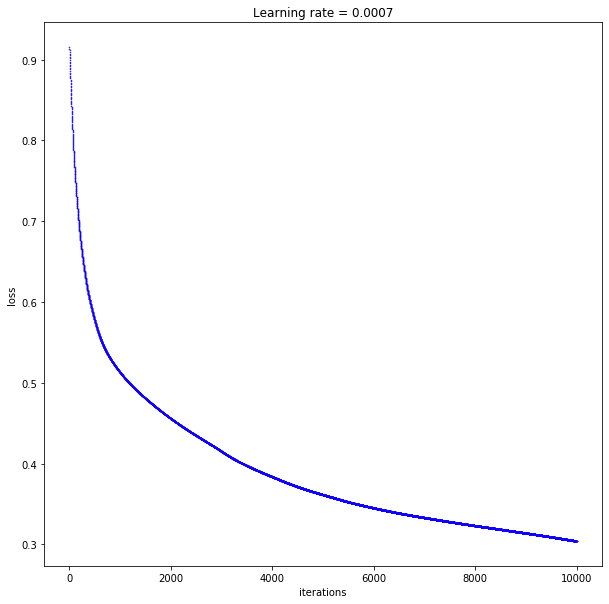

In [7]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0007')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

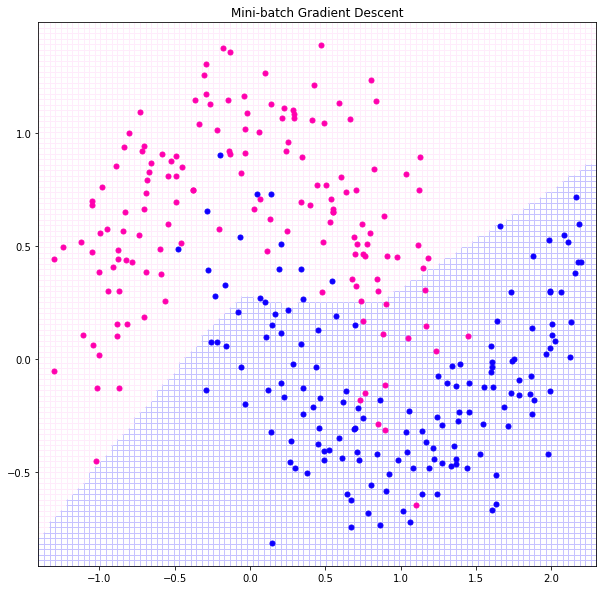

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Mini-batch Gradient Descent') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [9]:
def Model_(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    momentum = params['momentum']
    batch_size = params['batch_size']
    threshold = params['threshold']
    f1 = tf.keras.layers.Dense(dims[1], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f2 = tf.keras.layers.Dense(dims[2], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(dims[-1], 
                               activation='sigmoid', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    x = tf.keras.Input(shape=(dims[0]))
    a1 = f1(x)
    a2 = f2(a1)
    y = f3(a2)
    model = tf.keras.Model(x, y) 
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [10]:
model_ = Model_({'dims': [X_train.shape[1], 5, 2, Y_train.shape[1]], 
                 'X_train': X_train,
                 'Y_train': Y_train,
                 'epochs': 10000, 
                 'learning_rate': 0.0007,
                 'momentum': 0.9,
                 'batch_size': 64,
                 'threshold': 0.5})

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/10000
300/300 [==============================] - 0s 959us/sample - loss: 0.4120 - binary_accuracy: 0.8467
Epoch 2/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4110 - binary_accuracy: 0.8467
Epoch 3/10000

300/300 [==============================] - 0s 30us/sample - loss: 0.3641 - binary_accuracy: 0.8500
Epoch 66/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3638 - binary_accuracy: 0.8500
Epoch 67/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3636 - binary_accuracy: 0.8500
Epoch 68/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3634 - binary_accuracy: 0.8500
Epoch 69/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3632 - binary_accuracy: 0.8500
Epoch 70/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3630 - binary_accuracy: 0.8500
Epoch 71/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3628 - binary_accuracy: 0.8500
Epoch 72/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3626 - binary_accuracy: 0.8500
Epoch 73/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3624 - binary_accura

300/300 [==============================] - 0s 22us/sample - loss: 0.3546 - binary_accuracy: 0.8533
Epoch 137/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3545 - binary_accuracy: 0.8533
Epoch 138/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3544 - binary_accuracy: 0.8533
Epoch 139/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3543 - binary_accuracy: 0.8533
Epoch 140/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3542 - binary_accuracy: 0.8533
Epoch 141/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3542 - binary_accuracy: 0.8533
Epoch 142/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3540 - binary_accuracy: 0.8533
Epoch 143/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3540 - binary_accuracy: 0.8533
Epoch 144/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3539 - binar

300/300 [==============================] - 0s 32us/sample - loss: 0.3491 - binary_accuracy: 0.8633
Epoch 208/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3490 - binary_accuracy: 0.8633
Epoch 209/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3490 - binary_accuracy: 0.8633
Epoch 210/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3489 - binary_accuracy: 0.8633
Epoch 211/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3488 - binary_accuracy: 0.8633
Epoch 212/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3487 - binary_accuracy: 0.8633
Epoch 213/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3487 - binary_accuracy: 0.8633
Epoch 214/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3487 - binary_accuracy: 0.8633
Epoch 215/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3486 - binar

300/300 [==============================] - 0s 27us/sample - loss: 0.3429 - binary_accuracy: 0.8533
Epoch 279/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3429 - binary_accuracy: 0.8533
Epoch 280/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3428 - binary_accuracy: 0.8533
Epoch 281/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3427 - binary_accuracy: 0.8533
Epoch 282/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3427 - binary_accuracy: 0.8533
Epoch 283/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3425 - binary_accuracy: 0.8567
Epoch 284/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3424 - binary_accuracy: 0.8567
Epoch 285/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3423 - binary_accuracy: 0.8567
Epoch 286/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3422 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.3368 - binary_accuracy: 0.8600
Epoch 350/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3368 - binary_accuracy: 0.8600
Epoch 351/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3367 - binary_accuracy: 0.8600
Epoch 352/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3366 - binary_accuracy: 0.8600
Epoch 353/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3366 - binary_accuracy: 0.8600
Epoch 354/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3364 - binary_accuracy: 0.8600
Epoch 355/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3363 - binary_accuracy: 0.8600
Epoch 356/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3362 - binary_accuracy: 0.8600
Epoch 357/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3362 - binar

300/300 [==============================] - 0s 24us/sample - loss: 0.3312 - binary_accuracy: 0.8633
Epoch 421/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3311 - binary_accuracy: 0.8633
Epoch 422/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3310 - binary_accuracy: 0.8633
Epoch 423/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3310 - binary_accuracy: 0.8633
Epoch 424/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3309 - binary_accuracy: 0.8633
Epoch 425/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3308 - binary_accuracy: 0.8633
Epoch 426/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3307 - binary_accuracy: 0.8633
Epoch 427/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3306 - binary_accuracy: 0.8633
Epoch 428/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3305 - binar

300/300 [==============================] - 0s 25us/sample - loss: 0.3262 - binary_accuracy: 0.8667
Epoch 492/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3262 - binary_accuracy: 0.8667
Epoch 493/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3261 - binary_accuracy: 0.8667
Epoch 494/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3260 - binary_accuracy: 0.8667
Epoch 495/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3260 - binary_accuracy: 0.8667
Epoch 496/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3259 - binary_accuracy: 0.8667
Epoch 497/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3259 - binary_accuracy: 0.8633
Epoch 498/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3258 - binary_accuracy: 0.8633
Epoch 499/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3258 - binar

300/300 [==============================] - 0s 25us/sample - loss: 0.3222 - binary_accuracy: 0.8733
Epoch 563/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3221 - binary_accuracy: 0.8700
Epoch 564/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3221 - binary_accuracy: 0.8733
Epoch 565/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3220 - binary_accuracy: 0.8667
Epoch 566/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3220 - binary_accuracy: 0.8667
Epoch 567/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3220 - binary_accuracy: 0.8667
Epoch 568/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3219 - binary_accuracy: 0.8667
Epoch 569/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3218 - binary_accuracy: 0.8667
Epoch 570/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3218 - binar

300/300 [==============================] - 0s 30us/sample - loss: 0.3189 - binary_accuracy: 0.8700
Epoch 634/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3190 - binary_accuracy: 0.8700
Epoch 635/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3189 - binary_accuracy: 0.8700
Epoch 636/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3188 - binary_accuracy: 0.8700
Epoch 637/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3188 - binary_accuracy: 0.8700
Epoch 638/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3187 - binary_accuracy: 0.8700
Epoch 639/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3187 - binary_accuracy: 0.8700
Epoch 640/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.3187 - binary_accuracy: 0.8700
Epoch 641/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3186 - binar

Epoch 704/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3162 - binary_accuracy: 0.8700
Epoch 705/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3162 - binary_accuracy: 0.8700
Epoch 706/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3162 - binary_accuracy: 0.8700
Epoch 707/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3161 - binary_accuracy: 0.8733
Epoch 708/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3160 - binary_accuracy: 0.8733
Epoch 709/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3160 - binary_accuracy: 0.8733
Epoch 710/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3160 - binary_accuracy: 0.8733
Epoch 711/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3160 - binary_accuracy: 0.8733
Epoch 712/10000
300/300 [==============================] - 0s 25us/sample - loss

300/300 [==============================] - 0s 24us/sample - loss: 0.3140 - binary_accuracy: 0.8733
Epoch 776/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3140 - binary_accuracy: 0.8733
Epoch 777/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3139 - binary_accuracy: 0.8733
Epoch 778/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3139 - binary_accuracy: 0.8733
Epoch 779/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3139 - binary_accuracy: 0.8733
Epoch 780/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3138 - binary_accuracy: 0.8733
Epoch 781/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3138 - binary_accuracy: 0.8733
Epoch 782/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3138 - binary_accuracy: 0.8733
Epoch 783/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3137 - binar

300/300 [==============================] - 0s 26us/sample - loss: 0.3117 - binary_accuracy: 0.8733
Epoch 847/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3116 - binary_accuracy: 0.8733
Epoch 848/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3116 - binary_accuracy: 0.8733
Epoch 849/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3116 - binary_accuracy: 0.8733
Epoch 850/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3117 - binary_accuracy: 0.8733
Epoch 851/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3115 - binary_accuracy: 0.8733
Epoch 852/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3115 - binary_accuracy: 0.8733
Epoch 853/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3114 - binary_accuracy: 0.8733
Epoch 854/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3114 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.3094 - binary_accuracy: 0.8733
Epoch 918/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3093 - binary_accuracy: 0.8733
Epoch 919/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3093 - binary_accuracy: 0.8733
Epoch 920/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3093 - binary_accuracy: 0.8733
Epoch 921/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3092 - binary_accuracy: 0.8733
Epoch 922/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3092 - binary_accuracy: 0.8733
Epoch 923/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3092 - binary_accuracy: 0.8767
Epoch 924/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3091 - binary_accuracy: 0.8767
Epoch 925/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3091 - binar

300/300 [==============================] - 0s 29us/sample - loss: 0.3071 - binary_accuracy: 0.8733
Epoch 989/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3072 - binary_accuracy: 0.8733
Epoch 990/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3071 - binary_accuracy: 0.8733
Epoch 991/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3071 - binary_accuracy: 0.8767
Epoch 992/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3071 - binary_accuracy: 0.8733
Epoch 993/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3070 - binary_accuracy: 0.8733
Epoch 994/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3070 - binary_accuracy: 0.8733
Epoch 995/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3069 - binary_accuracy: 0.8733
Epoch 996/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3069 - binar

300/300 [==============================] - 0s 27us/sample - loss: 0.3051 - binary_accuracy: 0.8767
Epoch 1059/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3050 - binary_accuracy: 0.8767
Epoch 1060/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3050 - binary_accuracy: 0.8767
Epoch 1061/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3050 - binary_accuracy: 0.8767
Epoch 1062/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3050 - binary_accuracy: 0.8767
Epoch 1063/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3049 - binary_accuracy: 0.8767
Epoch 1064/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3049 - binary_accuracy: 0.8767
Epoch 1065/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3050 - binary_accuracy: 0.8733
Epoch 1066/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3048

300/300 [==============================] - 0s 28us/sample - loss: 0.3030 - binary_accuracy: 0.8733
Epoch 1129/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3029 - binary_accuracy: 0.8733
Epoch 1130/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3029 - binary_accuracy: 0.8700
Epoch 1131/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3029 - binary_accuracy: 0.8733
Epoch 1132/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3028 - binary_accuracy: 0.8733
Epoch 1133/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3029 - binary_accuracy: 0.8733
Epoch 1134/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3028 - binary_accuracy: 0.8733
Epoch 1135/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3029 - binary_accuracy: 0.8700
Epoch 1136/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3027

300/300 [==============================] - 0s 27us/sample - loss: 0.3005 - binary_accuracy: 0.8700
Epoch 1199/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3005 - binary_accuracy: 0.8700
Epoch 1200/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3005 - binary_accuracy: 0.8700
Epoch 1201/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3004 - binary_accuracy: 0.8700
Epoch 1202/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.3004 - binary_accuracy: 0.8700
Epoch 1203/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3004 - binary_accuracy: 0.8700
Epoch 1204/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3004 - binary_accuracy: 0.8700
Epoch 1205/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3004 - binary_accuracy: 0.8733
Epoch 1206/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3003

300/300 [==============================] - 0s 28us/sample - loss: 0.2986 - binary_accuracy: 0.8700
Epoch 1269/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2986 - binary_accuracy: 0.8733
Epoch 1270/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2986 - binary_accuracy: 0.8733
Epoch 1271/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2985 - binary_accuracy: 0.8733
Epoch 1272/10000
300/300 [==============================] - 0s 48us/sample - loss: 0.2985 - binary_accuracy: 0.8733
Epoch 1273/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2986 - binary_accuracy: 0.8733
Epoch 1274/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2985 - binary_accuracy: 0.8733
Epoch 1275/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2985 - binary_accuracy: 0.8733
Epoch 1276/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2984

300/300 [==============================] - 0s 33us/sample - loss: 0.2971 - binary_accuracy: 0.8800
Epoch 1339/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2971 - binary_accuracy: 0.8800
Epoch 1340/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2971 - binary_accuracy: 0.8800
Epoch 1341/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2971 - binary_accuracy: 0.8800
Epoch 1342/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2972 - binary_accuracy: 0.8767
Epoch 1343/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2971 - binary_accuracy: 0.8767
Epoch 1344/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2971 - binary_accuracy: 0.8800
Epoch 1345/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2970 - binary_accuracy: 0.8800
Epoch 1346/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2970

300/300 [==============================] - 0s 23us/sample - loss: 0.2954 - binary_accuracy: 0.8800
Epoch 1409/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2954 - binary_accuracy: 0.8800
Epoch 1410/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2953 - binary_accuracy: 0.8800
Epoch 1411/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2953 - binary_accuracy: 0.8800
Epoch 1412/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2953 - binary_accuracy: 0.8733
Epoch 1413/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2953 - binary_accuracy: 0.8733
Epoch 1414/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2953 - binary_accuracy: 0.8733
Epoch 1415/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2952 - binary_accuracy: 0.8733
Epoch 1416/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2952

300/300 [==============================] - 0s 29us/sample - loss: 0.2941 - binary_accuracy: 0.8800
Epoch 1479/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2941 - binary_accuracy: 0.8767
Epoch 1480/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2940 - binary_accuracy: 0.8767
Epoch 1481/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2941 - binary_accuracy: 0.8767
Epoch 1482/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2940 - binary_accuracy: 0.8733
Epoch 1483/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2939 - binary_accuracy: 0.8767
Epoch 1484/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2940 - binary_accuracy: 0.8767
Epoch 1485/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2939 - binary_accuracy: 0.8767
Epoch 1486/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2939

300/300 [==============================] - 0s 25us/sample - loss: 0.2930 - binary_accuracy: 0.8700
Epoch 1549/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2930 - binary_accuracy: 0.8700
Epoch 1550/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2929 - binary_accuracy: 0.8700
Epoch 1551/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2929 - binary_accuracy: 0.8700
Epoch 1552/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2930 - binary_accuracy: 0.8700
Epoch 1553/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2929 - binary_accuracy: 0.8700
Epoch 1554/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2929 - binary_accuracy: 0.8700
Epoch 1555/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.2929 - binary_accuracy: 0.8700
Epoch 1556/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2929

300/300 [==============================] - 0s 25us/sample - loss: 0.2921 - binary_accuracy: 0.8667
Epoch 1619/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2921 - binary_accuracy: 0.8700
Epoch 1620/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2921 - binary_accuracy: 0.8733
Epoch 1621/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2920 - binary_accuracy: 0.8733
Epoch 1622/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2920 - binary_accuracy: 0.8700
Epoch 1623/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2921 - binary_accuracy: 0.8700
Epoch 1624/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2919 - binary_accuracy: 0.8700
Epoch 1625/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2920 - binary_accuracy: 0.8767
Epoch 1626/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2919

300/300 [==============================] - 0s 29us/sample - loss: 0.2910 - binary_accuracy: 0.8767
Epoch 1689/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2911 - binary_accuracy: 0.8767
Epoch 1690/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2910 - binary_accuracy: 0.8767
Epoch 1691/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2910 - binary_accuracy: 0.8767
Epoch 1692/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2911 - binary_accuracy: 0.8767
Epoch 1693/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2909 - binary_accuracy: 0.8767
Epoch 1694/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2911 - binary_accuracy: 0.8767
Epoch 1695/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2910 - binary_accuracy: 0.8767
Epoch 1696/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2910

300/300 [==============================] - 0s 26us/sample - loss: 0.2901 - binary_accuracy: 0.8733
Epoch 1759/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2901 - binary_accuracy: 0.8767
Epoch 1760/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2900 - binary_accuracy: 0.8767
Epoch 1761/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2901 - binary_accuracy: 0.8767
Epoch 1762/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2902 - binary_accuracy: 0.8767
Epoch 1763/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2900 - binary_accuracy: 0.8767
Epoch 1764/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2900 - binary_accuracy: 0.8767
Epoch 1765/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2900 - binary_accuracy: 0.8767
Epoch 1766/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2900

300/300 [==============================] - 0s 30us/sample - loss: 0.2893 - binary_accuracy: 0.8767
Epoch 1829/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2892 - binary_accuracy: 0.8767
Epoch 1830/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2892 - binary_accuracy: 0.8767
Epoch 1831/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2892 - binary_accuracy: 0.8767
Epoch 1832/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2892 - binary_accuracy: 0.8767
Epoch 1833/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2892 - binary_accuracy: 0.8767
Epoch 1834/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2891 - binary_accuracy: 0.8767
Epoch 1835/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2891 - binary_accuracy: 0.8767
Epoch 1836/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2891

300/300 [==============================] - 0s 29us/sample - loss: 0.2886 - binary_accuracy: 0.8800
Epoch 1899/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2885 - binary_accuracy: 0.8800
Epoch 1900/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2885 - binary_accuracy: 0.8800
Epoch 1901/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2885 - binary_accuracy: 0.8800
Epoch 1902/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2884 - binary_accuracy: 0.8800
Epoch 1903/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2884 - binary_accuracy: 0.8800
Epoch 1904/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2884 - binary_accuracy: 0.8800
Epoch 1905/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2884 - binary_accuracy: 0.8800
Epoch 1906/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2883

300/300 [==============================] - 0s 25us/sample - loss: 0.2859 - binary_accuracy: 0.8867
Epoch 1969/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2858 - binary_accuracy: 0.8867
Epoch 1970/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2858 - binary_accuracy: 0.8867
Epoch 1971/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2858 - binary_accuracy: 0.8867
Epoch 1972/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2857 - binary_accuracy: 0.8867
Epoch 1973/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2857 - binary_accuracy: 0.8867
Epoch 1974/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2856 - binary_accuracy: 0.8867
Epoch 1975/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2856 - binary_accuracy: 0.8867
Epoch 1976/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2856

300/300 [==============================] - 0s 32us/sample - loss: 0.2839 - binary_accuracy: 0.8867
Epoch 2039/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2839 - binary_accuracy: 0.8867
Epoch 2040/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2839 - binary_accuracy: 0.8867
Epoch 2041/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2838 - binary_accuracy: 0.8867
Epoch 2042/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2839 - binary_accuracy: 0.8867
Epoch 2043/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2838 - binary_accuracy: 0.8867
Epoch 2044/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2838 - binary_accuracy: 0.8867
Epoch 2045/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2837 - binary_accuracy: 0.8867
Epoch 2046/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2837

300/300 [==============================] - 0s 38us/sample - loss: 0.2815 - binary_accuracy: 0.8833
Epoch 2109/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2815 - binary_accuracy: 0.8833
Epoch 2110/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2815 - binary_accuracy: 0.8833
Epoch 2111/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2814 - binary_accuracy: 0.8833
Epoch 2112/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.2814 - binary_accuracy: 0.8833
Epoch 2113/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2814 - binary_accuracy: 0.8833
Epoch 2114/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2813 - binary_accuracy: 0.8833
Epoch 2115/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2813 - binary_accuracy: 0.8833
Epoch 2116/10000
300/300 [==============================] - 0s 42us/sample - loss: 0.2813

300/300 [==============================] - 0s 26us/sample - loss: 0.2788 - binary_accuracy: 0.8833
Epoch 2179/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2788 - binary_accuracy: 0.8833
Epoch 2180/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2788 - binary_accuracy: 0.8833
Epoch 2181/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2787 - binary_accuracy: 0.8833
Epoch 2182/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2787 - binary_accuracy: 0.8833
Epoch 2183/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2786 - binary_accuracy: 0.8833
Epoch 2184/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2786 - binary_accuracy: 0.8833
Epoch 2185/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2786 - binary_accuracy: 0.8833
Epoch 2186/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2785

300/300 [==============================] - 0s 31us/sample - loss: 0.2757 - binary_accuracy: 0.8833
Epoch 2249/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2756 - binary_accuracy: 0.8833
Epoch 2250/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2756 - binary_accuracy: 0.8833
Epoch 2251/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2756 - binary_accuracy: 0.8833
Epoch 2252/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2755 - binary_accuracy: 0.8833
Epoch 2253/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2755 - binary_accuracy: 0.8833
Epoch 2254/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2754 - binary_accuracy: 0.8833
Epoch 2255/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2754 - binary_accuracy: 0.8833
Epoch 2256/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2754

300/300 [==============================] - 0s 26us/sample - loss: 0.2725 - binary_accuracy: 0.8967
Epoch 2319/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2725 - binary_accuracy: 0.8967
Epoch 2320/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2724 - binary_accuracy: 0.8967
Epoch 2321/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2724 - binary_accuracy: 0.9000
Epoch 2322/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2723 - binary_accuracy: 0.9000
Epoch 2323/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2724 - binary_accuracy: 0.9000
Epoch 2324/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2722 - binary_accuracy: 0.9000
Epoch 2325/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2722 - binary_accuracy: 0.9000
Epoch 2326/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2721

300/300 [==============================] - 0s 31us/sample - loss: 0.2692 - binary_accuracy: 0.9033
Epoch 2389/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2691 - binary_accuracy: 0.9033
Epoch 2390/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2690 - binary_accuracy: 0.9033
Epoch 2391/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2690 - binary_accuracy: 0.9033
Epoch 2392/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2690 - binary_accuracy: 0.9033
Epoch 2393/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2689 - binary_accuracy: 0.9033
Epoch 2394/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2689 - binary_accuracy: 0.9033
Epoch 2395/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2688 - binary_accuracy: 0.9033
Epoch 2396/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2688

300/300 [==============================] - 0s 25us/sample - loss: 0.2647 - binary_accuracy: 0.9033
Epoch 2459/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2646 - binary_accuracy: 0.9033
Epoch 2460/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2645 - binary_accuracy: 0.9033
Epoch 2461/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2644 - binary_accuracy: 0.9033
Epoch 2462/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2643 - binary_accuracy: 0.9033
Epoch 2463/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2643 - binary_accuracy: 0.9033
Epoch 2464/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2642 - binary_accuracy: 0.9033
Epoch 2465/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2641 - binary_accuracy: 0.9033
Epoch 2466/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2640

300/300 [==============================] - 0s 25us/sample - loss: 0.2579 - binary_accuracy: 0.9100
Epoch 2529/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2578 - binary_accuracy: 0.9100
Epoch 2530/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2577 - binary_accuracy: 0.9100
Epoch 2531/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2577 - binary_accuracy: 0.9100
Epoch 2532/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2576 - binary_accuracy: 0.9100
Epoch 2533/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2575 - binary_accuracy: 0.9100
Epoch 2534/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2574 - binary_accuracy: 0.9100
Epoch 2535/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2573 - binary_accuracy: 0.9100
Epoch 2536/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2572

300/300 [==============================] - 0s 26us/sample - loss: 0.2523 - binary_accuracy: 0.9133
Epoch 2599/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2522 - binary_accuracy: 0.9133
Epoch 2600/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2521 - binary_accuracy: 0.9133
Epoch 2601/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2521 - binary_accuracy: 0.9133
Epoch 2602/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2520 - binary_accuracy: 0.9133
Epoch 2603/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2520 - binary_accuracy: 0.9133
Epoch 2604/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2518 - binary_accuracy: 0.9133
Epoch 2605/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2517 - binary_accuracy: 0.9133
Epoch 2606/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2516

300/300 [==============================] - 0s 32us/sample - loss: 0.2475 - binary_accuracy: 0.9067
Epoch 2669/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2474 - binary_accuracy: 0.9067
Epoch 2670/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2474 - binary_accuracy: 0.9067
Epoch 2671/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2473 - binary_accuracy: 0.9067
Epoch 2672/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2473 - binary_accuracy: 0.9067
Epoch 2673/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2472 - binary_accuracy: 0.9067
Epoch 2674/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2471 - binary_accuracy: 0.9067
Epoch 2675/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2471 - binary_accuracy: 0.9067
Epoch 2676/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2470

300/300 [==============================] - 0s 28us/sample - loss: 0.2438 - binary_accuracy: 0.9067
Epoch 2739/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2437 - binary_accuracy: 0.9067
Epoch 2740/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2437 - binary_accuracy: 0.9100
Epoch 2741/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2436 - binary_accuracy: 0.9100
Epoch 2742/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2436 - binary_accuracy: 0.9100
Epoch 2743/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2435 - binary_accuracy: 0.9100
Epoch 2744/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2435 - binary_accuracy: 0.9100
Epoch 2745/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2434 - binary_accuracy: 0.9100
Epoch 2746/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2434

300/300 [==============================] - 0s 32us/sample - loss: 0.2396 - binary_accuracy: 0.9100
Epoch 2809/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.2395 - binary_accuracy: 0.9100
Epoch 2810/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.2394 - binary_accuracy: 0.9100
Epoch 2811/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2394 - binary_accuracy: 0.9100
Epoch 2812/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2393 - binary_accuracy: 0.9100
Epoch 2813/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2392 - binary_accuracy: 0.9100
Epoch 2814/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2392 - binary_accuracy: 0.9100
Epoch 2815/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2391 - binary_accuracy: 0.9100
Epoch 2816/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2390

300/300 [==============================] - 0s 32us/sample - loss: 0.2351 - binary_accuracy: 0.9100
Epoch 2879/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.2350 - binary_accuracy: 0.9100
Epoch 2880/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.2349 - binary_accuracy: 0.9100
Epoch 2881/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2348 - binary_accuracy: 0.9100
Epoch 2882/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.2347 - binary_accuracy: 0.9100
Epoch 2883/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2347 - binary_accuracy: 0.9133
Epoch 2884/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2346 - binary_accuracy: 0.9133
Epoch 2885/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2345 - binary_accuracy: 0.9133
Epoch 2886/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.2345

300/300 [==============================] - 0s 39us/sample - loss: 0.2307 - binary_accuracy: 0.9167
Epoch 2949/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.2306 - binary_accuracy: 0.9167
Epoch 2950/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2305 - binary_accuracy: 0.9167
Epoch 2951/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.2305 - binary_accuracy: 0.9167
Epoch 2952/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.2304 - binary_accuracy: 0.9167
Epoch 2953/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.2304 - binary_accuracy: 0.9167
Epoch 2954/10000
300/300 [==============================] - 0s 42us/sample - loss: 0.2303 - binary_accuracy: 0.9167
Epoch 2955/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.2303 - binary_accuracy: 0.9167
Epoch 2956/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.2302

300/300 [==============================] - 0s 39us/sample - loss: 0.2261 - binary_accuracy: 0.9167
Epoch 3019/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.2260 - binary_accuracy: 0.9167
Epoch 3020/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.2260 - binary_accuracy: 0.9167
Epoch 3021/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.2259 - binary_accuracy: 0.9167
Epoch 3022/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2258 - binary_accuracy: 0.9167
Epoch 3023/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2257 - binary_accuracy: 0.9167
Epoch 3024/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2257 - binary_accuracy: 0.9167
Epoch 3025/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2257 - binary_accuracy: 0.9167
Epoch 3026/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2256

300/300 [==============================] - 0s 24us/sample - loss: 0.2219 - binary_accuracy: 0.9233
Epoch 3089/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2218 - binary_accuracy: 0.9233
Epoch 3090/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2218 - binary_accuracy: 0.9233
Epoch 3091/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2217 - binary_accuracy: 0.9233
Epoch 3092/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2217 - binary_accuracy: 0.9233
Epoch 3093/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2216 - binary_accuracy: 0.9233
Epoch 3094/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2216 - binary_accuracy: 0.9233
Epoch 3095/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2215 - binary_accuracy: 0.9233
Epoch 3096/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2214

300/300 [==============================] - 0s 31us/sample - loss: 0.2184 - binary_accuracy: 0.9233
Epoch 3159/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2183 - binary_accuracy: 0.9233
Epoch 3160/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2182 - binary_accuracy: 0.9233
Epoch 3161/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2182 - binary_accuracy: 0.9233
Epoch 3162/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2181 - binary_accuracy: 0.9233
Epoch 3163/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2181 - binary_accuracy: 0.9233
Epoch 3164/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2180 - binary_accuracy: 0.9233
Epoch 3165/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2179 - binary_accuracy: 0.9233
Epoch 3166/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2179

300/300 [==============================] - 0s 29us/sample - loss: 0.2138 - binary_accuracy: 0.9233
Epoch 3229/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2138 - binary_accuracy: 0.9233
Epoch 3230/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2137 - binary_accuracy: 0.9233
Epoch 3231/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2137 - binary_accuracy: 0.9233
Epoch 3232/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2136 - binary_accuracy: 0.9233
Epoch 3233/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2135 - binary_accuracy: 0.9233
Epoch 3234/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2135 - binary_accuracy: 0.9233
Epoch 3235/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2134 - binary_accuracy: 0.9233
Epoch 3236/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2134

300/300 [==============================] - 0s 32us/sample - loss: 0.2097 - binary_accuracy: 0.9200
Epoch 3299/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2096 - binary_accuracy: 0.9200
Epoch 3300/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2096 - binary_accuracy: 0.9200
Epoch 3301/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2095 - binary_accuracy: 0.9200
Epoch 3302/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.2095 - binary_accuracy: 0.9200
Epoch 3303/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2094 - binary_accuracy: 0.9200
Epoch 3304/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2093 - binary_accuracy: 0.9200
Epoch 3305/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2093 - binary_accuracy: 0.9200
Epoch 3306/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2092

300/300 [==============================] - 0s 24us/sample - loss: 0.2044 - binary_accuracy: 0.9233
Epoch 3369/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2043 - binary_accuracy: 0.9233
Epoch 3370/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2043 - binary_accuracy: 0.9233
Epoch 3371/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2042 - binary_accuracy: 0.9233
Epoch 3372/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2041 - binary_accuracy: 0.9233
Epoch 3373/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2040 - binary_accuracy: 0.9233
Epoch 3374/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2039 - binary_accuracy: 0.9233
Epoch 3375/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2039 - binary_accuracy: 0.9233
Epoch 3376/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2038

300/300 [==============================] - 0s 29us/sample - loss: 0.1996 - binary_accuracy: 0.9233
Epoch 3439/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1995 - binary_accuracy: 0.9233
Epoch 3440/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1994 - binary_accuracy: 0.9233
Epoch 3441/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1993 - binary_accuracy: 0.9233
Epoch 3442/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1993 - binary_accuracy: 0.9233
Epoch 3443/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1993 - binary_accuracy: 0.9233
Epoch 3444/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1991 - binary_accuracy: 0.9233
Epoch 3445/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1991 - binary_accuracy: 0.9233
Epoch 3446/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1990

300/300 [==============================] - 0s 28us/sample - loss: 0.1945 - binary_accuracy: 0.9233
Epoch 3509/10000
300/300 [==============================] - 0s 21us/sample - loss: 0.1945 - binary_accuracy: 0.9233
Epoch 3510/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1944 - binary_accuracy: 0.9233
Epoch 3511/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1943 - binary_accuracy: 0.9233
Epoch 3512/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1943 - binary_accuracy: 0.9233
Epoch 3513/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1942 - binary_accuracy: 0.9233
Epoch 3514/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1941 - binary_accuracy: 0.9233
Epoch 3515/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1940 - binary_accuracy: 0.9233
Epoch 3516/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1940

300/300 [==============================] - 0s 34us/sample - loss: 0.1870 - binary_accuracy: 0.9233
Epoch 3578/10000
300/300 [==============================] - 0s 45us/sample - loss: 0.1869 - binary_accuracy: 0.9233
Epoch 3579/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1869 - binary_accuracy: 0.9233
Epoch 3580/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1867 - binary_accuracy: 0.9233
Epoch 3581/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1866 - binary_accuracy: 0.9233
Epoch 3582/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1866 - binary_accuracy: 0.9233
Epoch 3583/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1865 - binary_accuracy: 0.9233
Epoch 3584/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1864 - binary_accuracy: 0.9233
Epoch 3585/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1862

300/300 [==============================] - 0s 33us/sample - loss: 0.1821 - binary_accuracy: 0.9267
Epoch 3648/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1822 - binary_accuracy: 0.9267
Epoch 3649/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1820 - binary_accuracy: 0.9267
Epoch 3650/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1820 - binary_accuracy: 0.9267
Epoch 3651/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1819 - binary_accuracy: 0.9267
Epoch 3652/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1819 - binary_accuracy: 0.9267
Epoch 3653/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1818 - binary_accuracy: 0.9267
Epoch 3654/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1817 - binary_accuracy: 0.9267
Epoch 3655/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1817

300/300 [==============================] - 0s 34us/sample - loss: 0.1772 - binary_accuracy: 0.9300
Epoch 3718/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1771 - binary_accuracy: 0.9300
Epoch 3719/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1770 - binary_accuracy: 0.9300
Epoch 3720/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1770 - binary_accuracy: 0.9300
Epoch 3721/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1769 - binary_accuracy: 0.9300
Epoch 3722/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1768 - binary_accuracy: 0.9300
Epoch 3723/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1767 - binary_accuracy: 0.9300
Epoch 3724/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1767 - binary_accuracy: 0.9300
Epoch 3725/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1766

300/300 [==============================] - 0s 25us/sample - loss: 0.1719 - binary_accuracy: 0.9300
Epoch 3788/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1717 - binary_accuracy: 0.9300
Epoch 3789/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1716 - binary_accuracy: 0.9300
Epoch 3790/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1714 - binary_accuracy: 0.9300
Epoch 3791/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1713 - binary_accuracy: 0.9300
Epoch 3792/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1711 - binary_accuracy: 0.9300
Epoch 3793/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1710 - binary_accuracy: 0.9300
Epoch 3794/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1709 - binary_accuracy: 0.9300
Epoch 3795/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1708

300/300 [==============================] - 0s 32us/sample - loss: 0.1628 - binary_accuracy: 0.9300
Epoch 3858/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1628 - binary_accuracy: 0.9300
Epoch 3859/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1627 - binary_accuracy: 0.9300
Epoch 3860/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1627 - binary_accuracy: 0.9300
Epoch 3861/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1626 - binary_accuracy: 0.9300
Epoch 3862/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1625 - binary_accuracy: 0.9300
Epoch 3863/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1624 - binary_accuracy: 0.9300
Epoch 3864/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1623 - binary_accuracy: 0.9300
Epoch 3865/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1622

300/300 [==============================] - 0s 27us/sample - loss: 0.1582 - binary_accuracy: 0.9300
Epoch 3928/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1581 - binary_accuracy: 0.9300
Epoch 3929/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1580 - binary_accuracy: 0.9300
Epoch 3930/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1580 - binary_accuracy: 0.9300
Epoch 3931/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1579 - binary_accuracy: 0.9300
Epoch 3932/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1579 - binary_accuracy: 0.9300
Epoch 3933/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1579 - binary_accuracy: 0.9300
Epoch 3934/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1577 - binary_accuracy: 0.9300
Epoch 3935/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1577

300/300 [==============================] - 0s 25us/sample - loss: 0.1545 - binary_accuracy: 0.9300
Epoch 3998/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1545 - binary_accuracy: 0.9300
Epoch 3999/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1544 - binary_accuracy: 0.9300
Epoch 4000/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1544 - binary_accuracy: 0.9300
Epoch 4001/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1543 - binary_accuracy: 0.9300
Epoch 4002/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1543 - binary_accuracy: 0.9300
Epoch 4003/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1542 - binary_accuracy: 0.9300
Epoch 4004/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1542 - binary_accuracy: 0.9300
Epoch 4005/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1542

300/300 [==============================] - 0s 30us/sample - loss: 0.1515 - binary_accuracy: 0.9333
Epoch 4068/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1515 - binary_accuracy: 0.9333
Epoch 4069/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1514 - binary_accuracy: 0.9333
Epoch 4070/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1515 - binary_accuracy: 0.9300
Epoch 4071/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1514 - binary_accuracy: 0.9333
Epoch 4072/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1513 - binary_accuracy: 0.9333
Epoch 4073/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1513 - binary_accuracy: 0.9333
Epoch 4074/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1513 - binary_accuracy: 0.9333
Epoch 4075/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1512

300/300 [==============================] - 0s 33us/sample - loss: 0.1495 - binary_accuracy: 0.9333
Epoch 4138/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1495 - binary_accuracy: 0.9333
Epoch 4139/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1494 - binary_accuracy: 0.9333
Epoch 4140/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1494 - binary_accuracy: 0.9333
Epoch 4141/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1494 - binary_accuracy: 0.9333
Epoch 4142/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1494 - binary_accuracy: 0.9333
Epoch 4143/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1493 - binary_accuracy: 0.9333
Epoch 4144/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1494 - binary_accuracy: 0.9333
Epoch 4145/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1493

300/300 [==============================] - 0s 45us/sample - loss: 0.1479 - binary_accuracy: 0.9333
Epoch 4208/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1478 - binary_accuracy: 0.9333
Epoch 4209/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1478 - binary_accuracy: 0.9333
Epoch 4210/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1478 - binary_accuracy: 0.9333
Epoch 4211/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1478 - binary_accuracy: 0.9333
Epoch 4212/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1477 - binary_accuracy: 0.9333
Epoch 4213/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1477 - binary_accuracy: 0.9333
Epoch 4214/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1477 - binary_accuracy: 0.9333
Epoch 4215/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1477

300/300 [==============================] - 0s 24us/sample - loss: 0.1465 - binary_accuracy: 0.9333
Epoch 4278/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1465 - binary_accuracy: 0.9333
Epoch 4279/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1466 - binary_accuracy: 0.9333
Epoch 4280/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1465 - binary_accuracy: 0.9333
Epoch 4281/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1464 - binary_accuracy: 0.9333
Epoch 4282/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1464 - binary_accuracy: 0.9333
Epoch 4283/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1464 - binary_accuracy: 0.9333
Epoch 4284/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1465 - binary_accuracy: 0.9333
Epoch 4285/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1464

300/300 [==============================] - 0s 28us/sample - loss: 0.1454 - binary_accuracy: 0.9333
Epoch 4348/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1454 - binary_accuracy: 0.9333
Epoch 4349/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1454 - binary_accuracy: 0.9333
Epoch 4350/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1454 - binary_accuracy: 0.9333
Epoch 4351/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1455 - binary_accuracy: 0.9333
Epoch 4352/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1453 - binary_accuracy: 0.9333
Epoch 4353/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1454 - binary_accuracy: 0.9333
Epoch 4354/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1453 - binary_accuracy: 0.9333
Epoch 4355/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1453

300/300 [==============================] - 0s 28us/sample - loss: 0.1445 - binary_accuracy: 0.9333
Epoch 4418/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1445 - binary_accuracy: 0.9333
Epoch 4419/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4420/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4421/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4422/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4423/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4424/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1444 - binary_accuracy: 0.9333
Epoch 4425/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1444

300/300 [==============================] - 0s 27us/sample - loss: 0.1438 - binary_accuracy: 0.9333
Epoch 4488/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1437 - binary_accuracy: 0.9333
Epoch 4489/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1437 - binary_accuracy: 0.9333
Epoch 4490/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1436 - binary_accuracy: 0.9333
Epoch 4491/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1436 - binary_accuracy: 0.9333
Epoch 4492/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1436 - binary_accuracy: 0.9333
Epoch 4493/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1436 - binary_accuracy: 0.9333
Epoch 4494/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1437 - binary_accuracy: 0.9333
Epoch 4495/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1436

300/300 [==============================] - 0s 27us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4558/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4559/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4560/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4561/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4562/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4563/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4564/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1429 - binary_accuracy: 0.9333
Epoch 4565/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1429

300/300 [==============================] - 0s 30us/sample - loss: 0.1424 - binary_accuracy: 0.9333
Epoch 4628/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1423 - binary_accuracy: 0.9333
Epoch 4629/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1423 - binary_accuracy: 0.9333
Epoch 4630/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1423 - binary_accuracy: 0.9333
Epoch 4631/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1423 - binary_accuracy: 0.9333
Epoch 4632/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1424 - binary_accuracy: 0.9333
Epoch 4633/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1423 - binary_accuracy: 0.9333
Epoch 4634/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1422 - binary_accuracy: 0.9333
Epoch 4635/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1423

300/300 [==============================] - 0s 33us/sample - loss: 0.1418 - binary_accuracy: 0.9300
Epoch 4698/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1418 - binary_accuracy: 0.9300
Epoch 4699/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1417 - binary_accuracy: 0.9300
Epoch 4700/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1418 - binary_accuracy: 0.9300
Epoch 4701/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1417 - binary_accuracy: 0.9300
Epoch 4702/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1418 - binary_accuracy: 0.9300
Epoch 4703/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1418 - binary_accuracy: 0.9300
Epoch 4704/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1417 - binary_accuracy: 0.9300
Epoch 4705/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1418

300/300 [==============================] - 0s 32us/sample - loss: 0.1414 - binary_accuracy: 0.9300
Epoch 4768/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4769/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4770/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4771/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4772/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4773/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1413 - binary_accuracy: 0.9300
Epoch 4774/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1412 - binary_accuracy: 0.9300
Epoch 4775/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1412

300/300 [==============================] - 0s 26us/sample - loss: 0.1409 - binary_accuracy: 0.9300
Epoch 4838/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1409 - binary_accuracy: 0.9300
Epoch 4839/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1409 - binary_accuracy: 0.9300
Epoch 4840/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1408 - binary_accuracy: 0.9300
Epoch 4841/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1408 - binary_accuracy: 0.9300
Epoch 4842/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1408 - binary_accuracy: 0.9300
Epoch 4843/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1408 - binary_accuracy: 0.9267
Epoch 4844/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1408 - binary_accuracy: 0.9267
Epoch 4845/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1408

300/300 [==============================] - 0s 29us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4908/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1406 - binary_accuracy: 0.9267
Epoch 4909/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4910/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1406 - binary_accuracy: 0.9267
Epoch 4911/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4912/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4913/10000
300/300 [==============================] - 0s 43us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4914/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1405 - binary_accuracy: 0.9267
Epoch 4915/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1405

300/300 [==============================] - 0s 28us/sample - loss: 0.1403 - binary_accuracy: 0.9267
Epoch 4978/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1403 - binary_accuracy: 0.9267
Epoch 4979/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1402 - binary_accuracy: 0.9267
Epoch 4980/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1402 - binary_accuracy: 0.9267
Epoch 4981/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1402 - binary_accuracy: 0.9267
Epoch 4982/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1403 - binary_accuracy: 0.9267
Epoch 4983/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1401 - binary_accuracy: 0.9267
Epoch 4984/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1402 - binary_accuracy: 0.9267
Epoch 4985/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1401

300/300 [==============================] - 0s 23us/sample - loss: 0.1400 - binary_accuracy: 0.9267
Epoch 5048/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1400 - binary_accuracy: 0.9267
Epoch 5049/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1399 - binary_accuracy: 0.9267
Epoch 5050/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1399 - binary_accuracy: 0.9267
Epoch 5051/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1399 - binary_accuracy: 0.9267
Epoch 5052/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1399 - binary_accuracy: 0.9267
Epoch 5053/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1399 - binary_accuracy: 0.9267
Epoch 5054/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1398 - binary_accuracy: 0.9267
Epoch 5055/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1399

300/300 [==============================] - 0s 24us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5118/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5119/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5120/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5121/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5122/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1397 - binary_accuracy: 0.9267
Epoch 5123/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1397 - binary_accuracy: 0.9267
Epoch 5124/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1396 - binary_accuracy: 0.9267
Epoch 5125/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1396

300/300 [==============================] - 0s 23us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5188/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5189/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5190/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5191/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5192/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1395 - binary_accuracy: 0.9267
Epoch 5193/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5194/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1394 - binary_accuracy: 0.9267
Epoch 5195/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1394

300/300 [==============================] - 0s 26us/sample - loss: 0.1392 - binary_accuracy: 0.9267
Epoch 5258/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5259/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5260/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5261/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5262/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5263/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1392 - binary_accuracy: 0.9267
Epoch 5264/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5265/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1391

300/300 [==============================] - 0s 28us/sample - loss: 0.1392 - binary_accuracy: 0.9267
Epoch 5328/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5329/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1390 - binary_accuracy: 0.9267
Epoch 5330/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1391 - binary_accuracy: 0.9267
Epoch 5331/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1389 - binary_accuracy: 0.9267
Epoch 5332/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1389 - binary_accuracy: 0.9267
Epoch 5333/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1389 - binary_accuracy: 0.9267
Epoch 5334/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1389 - binary_accuracy: 0.9267
Epoch 5335/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1390

300/300 [==============================] - 0s 24us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5398/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5399/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1388 - binary_accuracy: 0.9267
Epoch 5400/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1388 - binary_accuracy: 0.9267
Epoch 5401/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5402/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5403/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5404/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5405/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1387

300/300 [==============================] - 0s 23us/sample - loss: 0.1386 - binary_accuracy: 0.9267
Epoch 5468/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1386 - binary_accuracy: 0.9267
Epoch 5469/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5470/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5471/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5472/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1386 - binary_accuracy: 0.9267
Epoch 5473/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.1387 - binary_accuracy: 0.9267
Epoch 5474/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1386 - binary_accuracy: 0.9267
Epoch 5475/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1386

300/300 [==============================] - 0s 23us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5538/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1384 - binary_accuracy: 0.9267
Epoch 5539/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5540/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5541/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1384 - binary_accuracy: 0.9267
Epoch 5542/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1384 - binary_accuracy: 0.9267
Epoch 5543/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1385 - binary_accuracy: 0.9267
Epoch 5544/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1385 - binary_accuracy: 0.9300
Epoch 5545/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1385

300/300 [==============================] - 0s 22us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5608/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5609/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5610/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5611/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5612/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1384 - binary_accuracy: 0.9267
Epoch 5613/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5614/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1383 - binary_accuracy: 0.9267
Epoch 5615/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1383

300/300 [==============================] - 0s 29us/sample - loss: 0.1382 - binary_accuracy: 0.9267
Epoch 5678/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1381 - binary_accuracy: 0.9267
Epoch 5679/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1381 - binary_accuracy: 0.9267
Epoch 5680/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1382 - binary_accuracy: 0.9267
Epoch 5681/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1382 - binary_accuracy: 0.9267
Epoch 5682/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1381 - binary_accuracy: 0.9267
Epoch 5683/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1381 - binary_accuracy: 0.9267
Epoch 5684/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1382 - binary_accuracy: 0.9300
Epoch 5685/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1382

300/300 [==============================] - 0s 25us/sample - loss: 0.1381 - binary_accuracy: 0.9300
Epoch 5748/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5749/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5750/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5751/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5752/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5753/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1380 - binary_accuracy: 0.9267
Epoch 5754/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1380 - binary_accuracy: 0.9267
Epoch 5755/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1380

300/300 [==============================] - 0s 24us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5818/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5819/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5820/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5821/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5822/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5823/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1380 - binary_accuracy: 0.9300
Epoch 5824/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5825/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1380

300/300 [==============================] - 0s 30us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5888/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5889/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1378 - binary_accuracy: 0.9300
Epoch 5890/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1378 - binary_accuracy: 0.9300
Epoch 5891/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5892/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5893/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1378 - binary_accuracy: 0.9267
Epoch 5894/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1377 - binary_accuracy: 0.9267
Epoch 5895/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1377

300/300 [==============================] - 0s 30us/sample - loss: 0.1376 - binary_accuracy: 0.9267
Epoch 5958/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1376 - binary_accuracy: 0.9267
Epoch 5959/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1378 - binary_accuracy: 0.9300
Epoch 5960/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5961/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5962/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5963/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1377 - binary_accuracy: 0.9300
Epoch 5964/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1379 - binary_accuracy: 0.9300
Epoch 5965/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1376

300/300 [==============================] - 0s 27us/sample - loss: 0.1376 - binary_accuracy: 0.9300
Epoch 6028/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1376 - binary_accuracy: 0.9300
Epoch 6029/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1375 - binary_accuracy: 0.9300
Epoch 6030/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6031/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6032/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6033/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6034/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6035/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1375

300/300 [==============================] - 0s 26us/sample - loss: 0.1375 - binary_accuracy: 0.9300
Epoch 6098/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6099/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6100/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1374 - binary_accuracy: 0.9267
Epoch 6101/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6102/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6103/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6104/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6105/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1375

300/300 [==============================] - 0s 28us/sample - loss: 0.1374 - binary_accuracy: 0.9267
Epoch 6168/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6169/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6170/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6171/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1373 - binary_accuracy: 0.9300
Epoch 6172/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1373 - binary_accuracy: 0.9300
Epoch 6173/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1373 - binary_accuracy: 0.9300
Epoch 6174/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6175/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1373

300/300 [==============================] - 0s 26us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6238/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6239/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6240/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1372 - binary_accuracy: 0.9300
Epoch 6241/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1375 - binary_accuracy: 0.9267
Epoch 6242/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6243/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1373 - binary_accuracy: 0.9300
Epoch 6244/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1374 - binary_accuracy: 0.9300
Epoch 6245/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1372

300/300 [==============================] - 0s 29us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6308/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6309/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1372 - binary_accuracy: 0.9267
Epoch 6310/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6311/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6312/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1372 - binary_accuracy: 0.9267
Epoch 6313/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1373 - binary_accuracy: 0.9267
Epoch 6314/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6315/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1371

300/300 [==============================] - 0s 22us/sample - loss: 0.1371 - binary_accuracy: 0.9300
Epoch 6378/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1372 - binary_accuracy: 0.9300
Epoch 6379/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6380/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6381/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1372 - binary_accuracy: 0.9267
Epoch 6382/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6383/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6384/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1372 - binary_accuracy: 0.9267
Epoch 6385/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1371

300/300 [==============================] - 0s 23us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6448/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6449/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1372 - binary_accuracy: 0.9267
Epoch 6450/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1370 - binary_accuracy: 0.9300
Epoch 6451/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6452/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6453/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6454/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6455/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1370

300/300 [==============================] - 0s 27us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6518/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6519/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1370 - binary_accuracy: 0.9300
Epoch 6520/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1370 - binary_accuracy: 0.9300
Epoch 6521/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6522/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6523/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6524/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6525/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1370

300/300 [==============================] - 0s 25us/sample - loss: 0.1371 - binary_accuracy: 0.9267
Epoch 6588/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6589/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6590/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6591/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 6592/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 6593/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 6594/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 6595/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1370

300/300 [==============================] - 0s 29us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6658/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6659/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6660/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6661/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6662/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6663/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6664/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6665/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1369

300/300 [==============================] - 0s 25us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6728/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1369 - binary_accuracy: 0.9267
Epoch 6729/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1368 - binary_accuracy: 0.9300
Epoch 6730/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1368 - binary_accuracy: 0.9300
Epoch 6731/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1368 - binary_accuracy: 0.9300
Epoch 6732/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6733/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6734/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6735/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1368

300/300 [==============================] - 0s 24us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6798/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6799/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6800/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6801/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6802/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6803/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1370 - binary_accuracy: 0.9300
Epoch 6804/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1368 - binary_accuracy: 0.9267
Epoch 6805/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1368

300/300 [==============================] - 0s 28us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6868/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6869/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1367 - binary_accuracy: 0.9300
Epoch 6870/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 6871/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1368 - binary_accuracy: 0.9300
Epoch 6872/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1368 - binary_accuracy: 0.9300
Epoch 6873/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6874/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1367 - binary_accuracy: 0.9300
Epoch 6875/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1368

300/300 [==============================] - 0s 33us/sample - loss: 0.1367 - binary_accuracy: 0.9300
Epoch 6938/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 6939/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 6940/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1367 - binary_accuracy: 0.9267
Epoch 6941/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 6942/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1370 - binary_accuracy: 0.9267
Epoch 6943/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 6944/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1367 - binary_accuracy: 0.9300
Epoch 6945/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1366

300/300 [==============================] - 0s 23us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7008/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1369 - binary_accuracy: 0.9300
Epoch 7009/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7010/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7011/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7012/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7013/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7014/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7015/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1367

300/300 [==============================] - 0s 29us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7078/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7079/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7080/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7081/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7082/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7083/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1365 - binary_accuracy: 0.9300
Epoch 7084/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7085/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1366

300/300 [==============================] - 0s 23us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7148/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7149/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7150/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7151/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7152/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1365 - binary_accuracy: 0.9300
Epoch 7153/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7154/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7155/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1365

300/300 [==============================] - 0s 27us/sample - loss: 0.1364 - binary_accuracy: 0.9267
Epoch 7218/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7219/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1366 - binary_accuracy: 0.9300
Epoch 7220/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7221/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1365 - binary_accuracy: 0.9300
Epoch 7222/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1365 - binary_accuracy: 0.9300
Epoch 7223/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7224/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7225/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1364

300/300 [==============================] - 0s 29us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7288/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1366 - binary_accuracy: 0.9267
Epoch 7289/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1365 - binary_accuracy: 0.9267
Epoch 7290/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1364 - binary_accuracy: 0.9267
Epoch 7291/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1364 - binary_accuracy: 0.9267
Epoch 7292/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7293/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1364 - binary_accuracy: 0.9267
Epoch 7294/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1367 - binary_accuracy: 0.9300
Epoch 7295/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1365

300/300 [==============================] - 0s 27us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7358/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7359/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7360/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7361/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7362/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7363/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7364/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7365/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1365

300/300 [==============================] - 0s 26us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7428/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7429/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7430/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7431/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7432/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7433/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7434/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7435/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1363

300/300 [==============================] - 0s 23us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7498/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7499/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1364 - binary_accuracy: 0.9267
Epoch 7500/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7501/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7502/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7503/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7504/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7505/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1362

300/300 [==============================] - 0s 23us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7568/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7569/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7570/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7571/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363 - binary_accuracy: 0.9300
Epoch 7572/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7573/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7574/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7575/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1362

300/300 [==============================] - 0s 26us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7638/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7639/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1362 - binary_accuracy: 0.9333
Epoch 7640/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7641/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7642/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7643/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7644/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1364 - binary_accuracy: 0.9300
Epoch 7645/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1363

300/300 [==============================] - 0s 28us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7708/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7709/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1362 - binary_accuracy: 0.9300
Epoch 7710/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1362 - binary_accuracy: 0.9333
Epoch 7711/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1363 - binary_accuracy: 0.9333
Epoch 7712/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1362 - binary_accuracy: 0.9333
Epoch 7713/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1362 - binary_accuracy: 0.9333
Epoch 7714/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1362 - binary_accuracy: 0.9333
Epoch 7715/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361

300/300 [==============================] - 0s 30us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7778/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7779/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7780/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7781/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1362 - binary_accuracy: 0.9267
Epoch 7782/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 7783/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7784/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1363 - binary_accuracy: 0.9333
Epoch 7785/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363

300/300 [==============================] - 0s 26us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7848/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 7849/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 7850/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1365 - binary_accuracy: 0.9333
Epoch 7851/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 7852/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 7853/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7854/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 7855/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1361

300/300 [==============================] - 0s 22us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7918/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7919/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7920/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7921/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 7922/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7923/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7924/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7925/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1361

300/300 [==============================] - 0s 28us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 7988/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 7989/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 7990/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7991/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 7992/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7993/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7994/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 7995/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360

300/300 [==============================] - 0s 24us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 8058/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8059/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 8060/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8061/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 8062/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8063/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1363 - binary_accuracy: 0.9267
Epoch 8064/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8065/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361

300/300 [==============================] - 0s 30us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8128/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 8129/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 8130/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 8131/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 8132/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 8133/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 8134/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361 - binary_accuracy: 0.9333
Epoch 8135/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1360

300/300 [==============================] - 0s 24us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8198/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8199/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8200/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1361 - binary_accuracy: 0.9300
Epoch 8201/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8202/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8203/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8204/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8205/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1360

300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8268/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8269/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8270/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8271/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8272/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8273/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8274/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8275/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359

300/300 [==============================] - 0s 30us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8338/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8339/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8340/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8341/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8342/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8343/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8344/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8345/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1359

300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8408/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8409/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1361 - binary_accuracy: 0.9267
Epoch 8410/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8411/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1359 - binary_accuracy: 0.9267
Epoch 8412/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9267
Epoch 8413/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8414/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8415/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1361

300/300 [==============================] - 0s 24us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 8478/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8479/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8480/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8481/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8482/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8483/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9267
Epoch 8484/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9267
Epoch 8485/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359

300/300 [==============================] - 0s 25us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8548/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8549/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8550/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8551/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8552/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8553/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8554/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8555/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1359

300/300 [==============================] - 0s 28us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8618/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8619/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8620/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8621/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8622/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8623/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8624/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8625/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359

300/300 [==============================] - 0s 24us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8688/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8689/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8690/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9300
Epoch 8691/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8692/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8693/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8694/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 8695/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1359

300/300 [==============================] - 0s 32us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8758/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8759/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8760/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8761/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8762/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8763/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 8764/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1359 - binary_accuracy: 0.9267
Epoch 8765/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1359

300/300 [==============================] - 0s 24us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8828/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 8829/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 8830/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 8831/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 8832/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 8833/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1359 - binary_accuracy: 0.9267
Epoch 8834/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 8835/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358

300/300 [==============================] - 0s 27us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 8898/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 8899/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 8900/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 8901/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8902/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8903/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1359 - binary_accuracy: 0.9333
Epoch 8904/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8905/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358

300/300 [==============================] - 0s 35us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8968/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1360 - binary_accuracy: 0.9333
Epoch 8969/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8970/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8971/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 8972/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8973/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8974/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 8975/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1357

300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 9038/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9039/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9040/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 9041/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9042/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9043/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9044/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9045/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1358

300/300 [==============================] - 0s 27us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 9108/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9109/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9110/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9111/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9112/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9113/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9114/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 9115/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1356

300/300 [==============================] - 0s 23us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9178/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9179/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9180/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9181/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 9182/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1357 - binary_accuracy: 0.9267
Epoch 9183/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9184/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9185/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1357

300/300 [==============================] - 0s 28us/sample - loss: 0.1359 - binary_accuracy: 0.9300
Epoch 9248/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9249/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9250/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9251/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9252/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9253/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9254/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9255/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356

300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9318/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9319/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9320/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9321/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9322/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9323/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9324/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9325/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1357

300/300 [==============================] - 0s 25us/sample - loss: 0.1358 - binary_accuracy: 0.9300
Epoch 9388/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9389/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9390/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9391/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9392/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9393/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9394/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9395/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356

300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9458/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9267
Epoch 9459/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9460/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9461/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9462/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1357 - binary_accuracy: 0.9267
Epoch 9463/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 9464/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9465/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1357

300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 9528/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9529/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9333
Epoch 9530/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9531/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9532/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9533/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9534/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9535/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1356

300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9598/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9599/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9600/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9601/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9602/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9603/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1357 - binary_accuracy: 0.9300
Epoch 9604/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9267
Epoch 9605/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356

300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9668/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9669/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9670/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9671/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9672/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9673/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9674/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9675/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1357

300/300 [==============================] - 0s 25us/sample - loss: 0.1357 - binary_accuracy: 0.9333
Epoch 9738/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9739/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9740/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9741/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9742/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9743/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9744/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9745/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1356

300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9808/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9809/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9810/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9811/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9812/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9333
Epoch 9813/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9814/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1355 - binary_accuracy: 0.9333
Epoch 9815/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1357

300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9878/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9879/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9880/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9881/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1355 - binary_accuracy: 0.9267
Epoch 9882/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9883/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1355 - binary_accuracy: 0.9267
Epoch 9884/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1356 - binary_accuracy: 0.9267
Epoch 9885/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1355

300/300 [==============================] - 0s 25us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9948/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1355 - binary_accuracy: 0.9300
Epoch 9949/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9950/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1354 - binary_accuracy: 0.9333
Epoch 9951/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1354 - binary_accuracy: 0.9333
Epoch 9952/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1354 - binary_accuracy: 0.9300
Epoch 9953/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1356 - binary_accuracy: 0.9300
Epoch 9954/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1354 - binary_accuracy: 0.9300
Epoch 9955/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1355

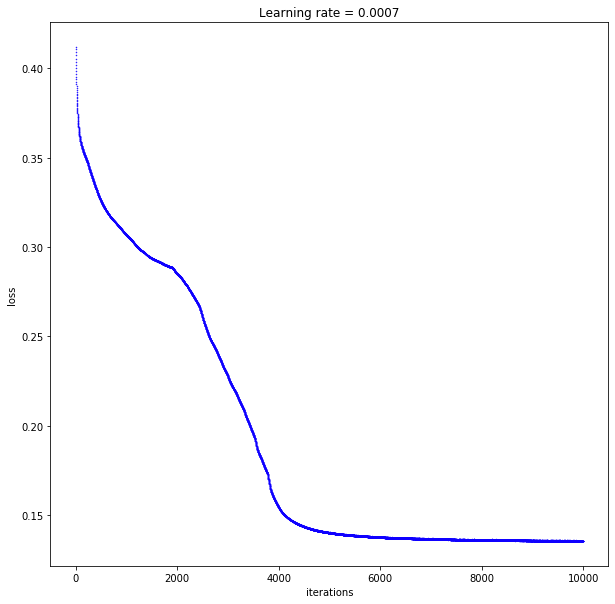

In [11]:
loss = model_.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0007')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

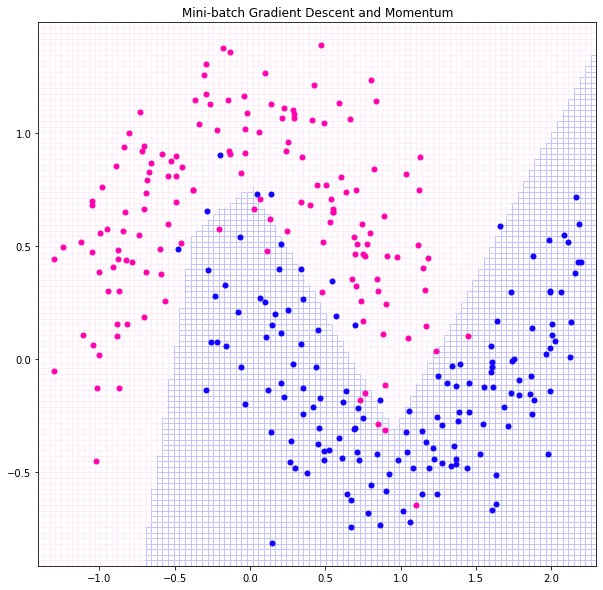

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Mini-batch Gradient Descent and Momentum') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model_.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [13]:
def Model__(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    beta_1 = params['beta_1']
    beta_2 = params['beta_2']
    epsilon = params['epsilon']
    batch_size = params['batch_size']
    threshold = params['threshold']
    f1 = tf.keras.layers.Dense(dims[1], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f2 = tf.keras.layers.Dense(dims[2], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(dims[-1], 
                               activation='sigmoid', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    x = tf.keras.Input(shape=(dims[0]))
    a1 = f1(x)
    a2 = f2(a1)
    y = f3(a2)
    model = tf.keras.Model(x, y) 
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=beta_1, 
                                         beta_2=beta_2, 
                                         epsilon=epsilon)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [14]:
model__ = Model__({'dims': [X_train.shape[1], 5, 2, Y_train.shape[1]], 
                   'X_train': X_train,
                   'Y_train': Y_train,
                   'epochs': 10000, 
                   'learning_rate': 0.0007,
                   'beta_1': 0.9,
                   'beta_2': 0.999,
                   'epsilon': 1e-8,
                   'batch_size': 64,
                   'threshold': 0.5})

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Train on 300 samples
Epoch 1/10000
300/300 [==============================] - 0s 1ms/sample - loss: 0.6368 - binary_accuracy: 0.5900
Epoch 2/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.6350 - binary_accuracy: 0.6000
Epoch 3/10000
3

300/300 [==============================] - 0s 40us/sample - loss: 0.5177 - binary_accuracy: 0.8133
Epoch 65/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.5161 - binary_accuracy: 0.8133
Epoch 66/10000
300/300 [==============================] - 0s 46us/sample - loss: 0.5147 - binary_accuracy: 0.8133
Epoch 67/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.5133 - binary_accuracy: 0.8133
Epoch 68/10000
300/300 [==============================] - 0s 43us/sample - loss: 0.5119 - binary_accuracy: 0.8133
Epoch 69/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.5105 - binary_accuracy: 0.8133
Epoch 70/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.5092 - binary_accuracy: 0.8133
Epoch 71/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.5078 - binary_accuracy: 0.8133
Epoch 72/10000
300/300 [==============================] - 0s 44us/sample - loss: 0.5065 - binary_accura

300/300 [==============================] - 0s 27us/sample - loss: 0.4498 - binary_accuracy: 0.8433
Epoch 136/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4493 - binary_accuracy: 0.8433
Epoch 137/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4486 - binary_accuracy: 0.8467
Epoch 138/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.4480 - binary_accuracy: 0.8467
Epoch 139/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4475 - binary_accuracy: 0.8467
Epoch 140/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.4469 - binary_accuracy: 0.8467
Epoch 141/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4463 - binary_accuracy: 0.8500
Epoch 142/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4457 - binary_accuracy: 0.8500
Epoch 143/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.4451 - binar

300/300 [==============================] - 0s 31us/sample - loss: 0.4159 - binary_accuracy: 0.8567
Epoch 207/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4155 - binary_accuracy: 0.8567
Epoch 208/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.4151 - binary_accuracy: 0.8567
Epoch 209/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.4147 - binary_accuracy: 0.8567
Epoch 210/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.4144 - binary_accuracy: 0.8567
Epoch 211/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.4140 - binary_accuracy: 0.8567
Epoch 212/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.4136 - binary_accuracy: 0.8567
Epoch 213/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.4132 - binary_accuracy: 0.8567
Epoch 214/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.4128 - binar

300/300 [==============================] - 0s 27us/sample - loss: 0.3918 - binary_accuracy: 0.8633
Epoch 278/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3915 - binary_accuracy: 0.8633
Epoch 279/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3912 - binary_accuracy: 0.8633
Epoch 280/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3909 - binary_accuracy: 0.8633
Epoch 281/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3906 - binary_accuracy: 0.8633
Epoch 282/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3904 - binary_accuracy: 0.8633
Epoch 283/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3901 - binary_accuracy: 0.8633
Epoch 284/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3898 - binary_accuracy: 0.8633
Epoch 285/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3895 - binar

300/300 [==============================] - 0s 23us/sample - loss: 0.3735 - binary_accuracy: 0.8733
Epoch 349/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.3732 - binary_accuracy: 0.8733
Epoch 350/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3730 - binary_accuracy: 0.8733
Epoch 351/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3728 - binary_accuracy: 0.8733
Epoch 352/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3725 - binary_accuracy: 0.8733
Epoch 353/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3723 - binary_accuracy: 0.8733
Epoch 354/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3720 - binary_accuracy: 0.8733
Epoch 355/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3718 - binary_accuracy: 0.8733
Epoch 356/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3716 - binar

300/300 [==============================] - 0s 25us/sample - loss: 0.3583 - binary_accuracy: 0.8700
Epoch 420/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3581 - binary_accuracy: 0.8700
Epoch 421/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3579 - binary_accuracy: 0.8733
Epoch 422/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3578 - binary_accuracy: 0.8733
Epoch 423/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3575 - binary_accuracy: 0.8733
Epoch 424/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3574 - binary_accuracy: 0.8733
Epoch 425/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3572 - binary_accuracy: 0.8733
Epoch 426/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3570 - binary_accuracy: 0.8767
Epoch 427/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3568 - binar

Epoch 490/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3442 - binary_accuracy: 0.8767
Epoch 491/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3440 - binary_accuracy: 0.8767
Epoch 492/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.3438 - binary_accuracy: 0.8767
Epoch 493/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3436 - binary_accuracy: 0.8767
Epoch 494/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3435 - binary_accuracy: 0.8767
Epoch 495/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.3432 - binary_accuracy: 0.8767
Epoch 496/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.3430 - binary_accuracy: 0.8767
Epoch 497/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.3428 - binary_accuracy: 0.8767
Epoch 498/10000
300/300 [==============================] - 0s 33us/sample - loss

300/300 [==============================] - 0s 30us/sample - loss: 0.3288 - binary_accuracy: 0.8767
Epoch 562/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.3285 - binary_accuracy: 0.8767
Epoch 563/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3283 - binary_accuracy: 0.8800
Epoch 564/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.3281 - binary_accuracy: 0.8800
Epoch 565/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3279 - binary_accuracy: 0.8800
Epoch 566/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3276 - binary_accuracy: 0.8800
Epoch 567/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3274 - binary_accuracy: 0.8800
Epoch 568/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.3272 - binary_accuracy: 0.8800
Epoch 569/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3270 - binar

300/300 [==============================] - 0s 23us/sample - loss: 0.3122 - binary_accuracy: 0.8933
Epoch 633/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.3119 - binary_accuracy: 0.8933
Epoch 634/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3117 - binary_accuracy: 0.8933
Epoch 635/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.3114 - binary_accuracy: 0.8933
Epoch 636/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3112 - binary_accuracy: 0.8933
Epoch 637/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.3109 - binary_accuracy: 0.8933
Epoch 638/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.3107 - binary_accuracy: 0.8933
Epoch 639/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.3104 - binary_accuracy: 0.8933
Epoch 640/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.3102 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.2907 - binary_accuracy: 0.9133
Epoch 704/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2903 - binary_accuracy: 0.9133
Epoch 705/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.2899 - binary_accuracy: 0.9133
Epoch 706/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2895 - binary_accuracy: 0.9167
Epoch 707/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2891 - binary_accuracy: 0.9167
Epoch 708/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2888 - binary_accuracy: 0.9133
Epoch 709/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2883 - binary_accuracy: 0.9133
Epoch 710/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2880 - binary_accuracy: 0.9167
Epoch 711/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.2875 - binar

300/300 [==============================] - 0s 22us/sample - loss: 0.2618 - binary_accuracy: 0.9233
Epoch 775/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2614 - binary_accuracy: 0.9233
Epoch 776/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2610 - binary_accuracy: 0.9233
Epoch 777/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2606 - binary_accuracy: 0.9233
Epoch 778/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.2602 - binary_accuracy: 0.9233
Epoch 779/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2598 - binary_accuracy: 0.9233
Epoch 780/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2595 - binary_accuracy: 0.9233
Epoch 781/10000
300/300 [==============================] - 0s 77us/sample - loss: 0.2591 - binary_accuracy: 0.9233
Epoch 782/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.2587 - binar

300/300 [==============================] - 0s 32us/sample - loss: 0.2370 - binary_accuracy: 0.9267
Epoch 846/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2367 - binary_accuracy: 0.9267
Epoch 847/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.2364 - binary_accuracy: 0.9267
Epoch 848/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2361 - binary_accuracy: 0.9267
Epoch 849/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2357 - binary_accuracy: 0.9267
Epoch 850/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2355 - binary_accuracy: 0.9267
Epoch 851/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.2352 - binary_accuracy: 0.9267
Epoch 852/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2349 - binary_accuracy: 0.9267
Epoch 853/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2346 - binar

300/300 [==============================] - 0s 28us/sample - loss: 0.2169 - binary_accuracy: 0.9300
Epoch 917/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2166 - binary_accuracy: 0.9300
Epoch 918/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2163 - binary_accuracy: 0.9300
Epoch 919/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2161 - binary_accuracy: 0.9300
Epoch 920/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2158 - binary_accuracy: 0.9300
Epoch 921/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.2156 - binary_accuracy: 0.9300
Epoch 922/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2153 - binary_accuracy: 0.9333
Epoch 923/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.2151 - binary_accuracy: 0.9333
Epoch 924/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.2148 - binar

300/300 [==============================] - 0s 27us/sample - loss: 0.2012 - binary_accuracy: 0.9333
Epoch 988/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.2010 - binary_accuracy: 0.9333
Epoch 989/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2008 - binary_accuracy: 0.9333
Epoch 990/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.2006 - binary_accuracy: 0.9333
Epoch 991/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.2004 - binary_accuracy: 0.9333
Epoch 992/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.2002 - binary_accuracy: 0.9333
Epoch 993/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.2001 - binary_accuracy: 0.9333
Epoch 994/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1999 - binary_accuracy: 0.9333
Epoch 995/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1997 - binar

300/300 [==============================] - 0s 26us/sample - loss: 0.1884 - binary_accuracy: 0.9333
Epoch 1058/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1883 - binary_accuracy: 0.9333
Epoch 1059/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1881 - binary_accuracy: 0.9333
Epoch 1060/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1879 - binary_accuracy: 0.9333
Epoch 1061/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1877 - binary_accuracy: 0.9333
Epoch 1062/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1876 - binary_accuracy: 0.9333
Epoch 1063/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1874 - binary_accuracy: 0.9333
Epoch 1064/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1873 - binary_accuracy: 0.9333
Epoch 1065/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1871

300/300 [==============================] - 0s 25us/sample - loss: 0.1782 - binary_accuracy: 0.9333
Epoch 1128/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1781 - binary_accuracy: 0.9333
Epoch 1129/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1779 - binary_accuracy: 0.9333
Epoch 1130/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1778 - binary_accuracy: 0.9333
Epoch 1131/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1777 - binary_accuracy: 0.9333
Epoch 1132/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1776 - binary_accuracy: 0.9333
Epoch 1133/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1775 - binary_accuracy: 0.9333
Epoch 1134/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1773 - binary_accuracy: 0.9333
Epoch 1135/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1772

300/300 [==============================] - 0s 30us/sample - loss: 0.1702 - binary_accuracy: 0.9333
Epoch 1198/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1701 - binary_accuracy: 0.9333
Epoch 1199/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1700 - binary_accuracy: 0.9333
Epoch 1200/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1699 - binary_accuracy: 0.9333
Epoch 1201/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1698 - binary_accuracy: 0.9333
Epoch 1202/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1698 - binary_accuracy: 0.9333
Epoch 1203/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1696 - binary_accuracy: 0.9333
Epoch 1204/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1695 - binary_accuracy: 0.9333
Epoch 1205/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1695

300/300 [==============================] - 0s 26us/sample - loss: 0.1639 - binary_accuracy: 0.9333
Epoch 1268/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1639 - binary_accuracy: 0.9333
Epoch 1269/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1638 - binary_accuracy: 0.9333
Epoch 1270/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1637 - binary_accuracy: 0.9333
Epoch 1271/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1636 - binary_accuracy: 0.9333
Epoch 1272/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1635 - binary_accuracy: 0.9333
Epoch 1273/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1634 - binary_accuracy: 0.9333
Epoch 1274/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1633 - binary_accuracy: 0.9333
Epoch 1275/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1632

300/300 [==============================] - 0s 29us/sample - loss: 0.1588 - binary_accuracy: 0.9400
Epoch 1338/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1588 - binary_accuracy: 0.9400
Epoch 1339/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1587 - binary_accuracy: 0.9400
Epoch 1340/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1587 - binary_accuracy: 0.9433
Epoch 1341/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1586 - binary_accuracy: 0.9433
Epoch 1342/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1586 - binary_accuracy: 0.9433
Epoch 1343/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1585 - binary_accuracy: 0.9433
Epoch 1344/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1584 - binary_accuracy: 0.9433
Epoch 1345/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1583

300/300 [==============================] - 0s 32us/sample - loss: 0.1551 - binary_accuracy: 0.9400
Epoch 1408/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1551 - binary_accuracy: 0.9433
Epoch 1409/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1550 - binary_accuracy: 0.9433
Epoch 1410/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1550 - binary_accuracy: 0.9433
Epoch 1411/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1549 - binary_accuracy: 0.9433
Epoch 1412/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1549 - binary_accuracy: 0.9433
Epoch 1413/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1548 - binary_accuracy: 0.9433
Epoch 1414/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1548 - binary_accuracy: 0.9433
Epoch 1415/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1548

300/300 [==============================] - 0s 24us/sample - loss: 0.1521 - binary_accuracy: 0.9400
Epoch 1478/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1521 - binary_accuracy: 0.9400
Epoch 1479/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1521 - binary_accuracy: 0.9400
Epoch 1480/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1520 - binary_accuracy: 0.9400
Epoch 1481/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1520 - binary_accuracy: 0.9400
Epoch 1482/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1519 - binary_accuracy: 0.9400
Epoch 1483/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1519 - binary_accuracy: 0.9400
Epoch 1484/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1518 - binary_accuracy: 0.9400
Epoch 1485/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1518

300/300 [==============================] - 0s 30us/sample - loss: 0.1496 - binary_accuracy: 0.9400
Epoch 1548/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1495 - binary_accuracy: 0.9400
Epoch 1549/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1495 - binary_accuracy: 0.9400
Epoch 1550/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1495 - binary_accuracy: 0.9400
Epoch 1551/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1494 - binary_accuracy: 0.9400
Epoch 1552/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1494 - binary_accuracy: 0.9400
Epoch 1553/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1494 - binary_accuracy: 0.9400
Epoch 1554/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1493 - binary_accuracy: 0.9400
Epoch 1555/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1493

300/300 [==============================] - 0s 30us/sample - loss: 0.1475 - binary_accuracy: 0.9400
Epoch 1618/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1474 - binary_accuracy: 0.9400
Epoch 1619/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1474 - binary_accuracy: 0.9400
Epoch 1620/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1474 - binary_accuracy: 0.9400
Epoch 1621/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1473 - binary_accuracy: 0.9400
Epoch 1622/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1473 - binary_accuracy: 0.9400
Epoch 1623/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1473 - binary_accuracy: 0.9400
Epoch 1624/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1473 - binary_accuracy: 0.9400
Epoch 1625/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1472

300/300 [==============================] - 0s 28us/sample - loss: 0.1457 - binary_accuracy: 0.9400
Epoch 1688/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1456 - binary_accuracy: 0.9400
Epoch 1689/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1457 - binary_accuracy: 0.9400
Epoch 1690/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1456 - binary_accuracy: 0.9400
Epoch 1691/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1456 - binary_accuracy: 0.9400
Epoch 1692/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1455 - binary_accuracy: 0.9400
Epoch 1693/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1457 - binary_accuracy: 0.9400
Epoch 1694/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1455 - binary_accuracy: 0.9400
Epoch 1695/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1456

300/300 [==============================] - 0s 33us/sample - loss: 0.1442 - binary_accuracy: 0.9400
Epoch 1758/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1759/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1442 - binary_accuracy: 0.9400
Epoch 1760/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1761/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1762/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1763/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1764/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1441 - binary_accuracy: 0.9400
Epoch 1765/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1440

300/300 [==============================] - 0s 27us/sample - loss: 0.1429 - binary_accuracy: 0.9400
Epoch 1828/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1829/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1830/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1831/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1832/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1833/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1834/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1428 - binary_accuracy: 0.9400
Epoch 1835/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1427

300/300 [==============================] - 0s 29us/sample - loss: 0.1417 - binary_accuracy: 0.9433
Epoch 1898/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1418 - binary_accuracy: 0.9433
Epoch 1899/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1416 - binary_accuracy: 0.9433
Epoch 1900/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1417 - binary_accuracy: 0.9433
Epoch 1901/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1417 - binary_accuracy: 0.9433
Epoch 1902/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1416 - binary_accuracy: 0.9433
Epoch 1903/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1416 - binary_accuracy: 0.9433
Epoch 1904/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1416 - binary_accuracy: 0.9433
Epoch 1905/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1416

300/300 [==============================] - 0s 29us/sample - loss: 0.1407 - binary_accuracy: 0.9433
Epoch 1968/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1407 - binary_accuracy: 0.9400
Epoch 1969/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1407 - binary_accuracy: 0.9400
Epoch 1970/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1407 - binary_accuracy: 0.9400
Epoch 1971/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1406 - binary_accuracy: 0.9433
Epoch 1972/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1406 - binary_accuracy: 0.9433
Epoch 1973/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1406 - binary_accuracy: 0.9433
Epoch 1974/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1406 - binary_accuracy: 0.9433
Epoch 1975/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1406

300/300 [==============================] - 0s 27us/sample - loss: 0.1398 - binary_accuracy: 0.9433
Epoch 2038/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1398 - binary_accuracy: 0.9433
Epoch 2039/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1398 - binary_accuracy: 0.9433
Epoch 2040/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1397 - binary_accuracy: 0.9433
Epoch 2041/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1398 - binary_accuracy: 0.9433
Epoch 2042/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1397 - binary_accuracy: 0.9433
Epoch 2043/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1397 - binary_accuracy: 0.9433
Epoch 2044/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1397 - binary_accuracy: 0.9433
Epoch 2045/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1398

300/300 [==============================] - 0s 29us/sample - loss: 0.1390 - binary_accuracy: 0.9433
Epoch 2108/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1390 - binary_accuracy: 0.9433
Epoch 2109/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1390 - binary_accuracy: 0.9467
Epoch 2110/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1390 - binary_accuracy: 0.9467
Epoch 2111/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1389 - binary_accuracy: 0.9433
Epoch 2112/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1389 - binary_accuracy: 0.9433
Epoch 2113/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1389 - binary_accuracy: 0.9467
Epoch 2114/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1389 - binary_accuracy: 0.9467
Epoch 2115/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1389

300/300 [==============================] - 0s 30us/sample - loss: 0.1383 - binary_accuracy: 0.9467
Epoch 2178/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1382 - binary_accuracy: 0.9467
Epoch 2179/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1382 - binary_accuracy: 0.9467
Epoch 2180/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1382 - binary_accuracy: 0.9467
Epoch 2181/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1382 - binary_accuracy: 0.9467
Epoch 2182/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1382 - binary_accuracy: 0.9467
Epoch 2183/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1382 - binary_accuracy: 0.9433
Epoch 2184/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1381 - binary_accuracy: 0.9467
Epoch 2185/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1381

300/300 [==============================] - 0s 29us/sample - loss: 0.1376 - binary_accuracy: 0.9500
Epoch 2248/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1376 - binary_accuracy: 0.9467
Epoch 2249/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1375 - binary_accuracy: 0.9467
Epoch 2250/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1375 - binary_accuracy: 0.9500
Epoch 2251/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1375 - binary_accuracy: 0.9467
Epoch 2252/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1375 - binary_accuracy: 0.9467
Epoch 2253/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1376 - binary_accuracy: 0.9433
Epoch 2254/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1374 - binary_accuracy: 0.9433
Epoch 2255/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1375

300/300 [==============================] - 0s 29us/sample - loss: 0.1370 - binary_accuracy: 0.9467
Epoch 2318/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1369 - binary_accuracy: 0.9467
Epoch 2319/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1369 - binary_accuracy: 0.9500
Epoch 2320/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1369 - binary_accuracy: 0.9467
Epoch 2321/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1369 - binary_accuracy: 0.9467
Epoch 2322/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1369 - binary_accuracy: 0.9467
Epoch 2323/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1369 - binary_accuracy: 0.9467
Epoch 2324/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1369 - binary_accuracy: 0.9433
Epoch 2325/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1369

300/300 [==============================] - 0s 29us/sample - loss: 0.1363 - binary_accuracy: 0.9500
Epoch 2388/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1364 - binary_accuracy: 0.9500
Epoch 2389/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1363 - binary_accuracy: 0.9500
Epoch 2390/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1363 - binary_accuracy: 0.9500
Epoch 2391/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1363 - binary_accuracy: 0.9500
Epoch 2392/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1363 - binary_accuracy: 0.9533
Epoch 2393/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1364 - binary_accuracy: 0.9533
Epoch 2394/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1363 - binary_accuracy: 0.9533
Epoch 2395/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1363

300/300 [==============================] - 0s 32us/sample - loss: 0.1359 - binary_accuracy: 0.9500
Epoch 2458/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1359 - binary_accuracy: 0.9500
Epoch 2459/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1359 - binary_accuracy: 0.9500
Epoch 2460/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1358 - binary_accuracy: 0.9500
Epoch 2461/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1358 - binary_accuracy: 0.9500
Epoch 2462/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1358 - binary_accuracy: 0.9500
Epoch 2463/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1358 - binary_accuracy: 0.9500
Epoch 2464/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358 - binary_accuracy: 0.9500
Epoch 2465/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1358

300/300 [==============================] - 0s 23us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2528/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2529/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1354 - binary_accuracy: 0.9500
Epoch 2530/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2531/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2532/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2533/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2534/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1353 - binary_accuracy: 0.9500
Epoch 2535/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1352

300/300 [==============================] - 0s 24us/sample - loss: 0.1347 - binary_accuracy: 0.9533
Epoch 2598/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1348 - binary_accuracy: 0.9533
Epoch 2599/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1348 - binary_accuracy: 0.9500
Epoch 2600/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1347 - binary_accuracy: 0.9500
Epoch 2601/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1347 - binary_accuracy: 0.9500
Epoch 2602/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1347 - binary_accuracy: 0.9500
Epoch 2603/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1348 - binary_accuracy: 0.9533
Epoch 2604/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1347 - binary_accuracy: 0.9533
Epoch 2605/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1346

300/300 [==============================] - 0s 28us/sample - loss: 0.1343 - binary_accuracy: 0.9533
Epoch 2668/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1342 - binary_accuracy: 0.9533
Epoch 2669/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1341 - binary_accuracy: 0.9500
Epoch 2670/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1342 - binary_accuracy: 0.9533
Epoch 2671/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1341 - binary_accuracy: 0.9533
Epoch 2672/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1342 - binary_accuracy: 0.9533
Epoch 2673/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1341 - binary_accuracy: 0.9533
Epoch 2674/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1342 - binary_accuracy: 0.9533
Epoch 2675/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1342

300/300 [==============================] - 0s 28us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2738/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2739/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2740/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2741/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2742/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1336 - binary_accuracy: 0.9500
Epoch 2743/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1336 - binary_accuracy: 0.9533
Epoch 2744/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1335 - binary_accuracy: 0.9533
Epoch 2745/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1335

300/300 [==============================] - 0s 27us/sample - loss: 0.1331 - binary_accuracy: 0.9533
Epoch 2808/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1332 - binary_accuracy: 0.9533
Epoch 2809/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1331 - binary_accuracy: 0.9533
Epoch 2810/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1330 - binary_accuracy: 0.9533
Epoch 2811/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1331 - binary_accuracy: 0.9533
Epoch 2812/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1331 - binary_accuracy: 0.9533
Epoch 2813/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1331 - binary_accuracy: 0.9533
Epoch 2814/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1330 - binary_accuracy: 0.9533
Epoch 2815/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1331

300/300 [==============================] - 0s 32us/sample - loss: 0.1328 - binary_accuracy: 0.9533
Epoch 2878/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1327 - binary_accuracy: 0.9533
Epoch 2879/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1329 - binary_accuracy: 0.9533
Epoch 2880/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1327 - binary_accuracy: 0.9533
Epoch 2881/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1328 - binary_accuracy: 0.9533
Epoch 2882/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1327 - binary_accuracy: 0.9533
Epoch 2883/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1327 - binary_accuracy: 0.9533
Epoch 2884/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1327 - binary_accuracy: 0.9533
Epoch 2885/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1328

300/300 [==============================] - 0s 29us/sample - loss: 0.1325 - binary_accuracy: 0.9533
Epoch 2948/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1325 - binary_accuracy: 0.9533
Epoch 2949/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1324 - binary_accuracy: 0.9533
Epoch 2950/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1324 - binary_accuracy: 0.9533
Epoch 2951/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1325 - binary_accuracy: 0.9533
Epoch 2952/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1324 - binary_accuracy: 0.9533
Epoch 2953/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1324 - binary_accuracy: 0.9533
Epoch 2954/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1324 - binary_accuracy: 0.9533
Epoch 2955/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1324

300/300 [==============================] - 0s 25us/sample - loss: 0.1322 - binary_accuracy: 0.9533
Epoch 3018/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1321 - binary_accuracy: 0.9533
Epoch 3019/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1321 - binary_accuracy: 0.9533
Epoch 3020/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1322 - binary_accuracy: 0.9533
Epoch 3021/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1321 - binary_accuracy: 0.9500
Epoch 3022/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1321 - binary_accuracy: 0.9500
Epoch 3023/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1321 - binary_accuracy: 0.9500
Epoch 3024/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1321 - binary_accuracy: 0.9500
Epoch 3025/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1321

300/300 [==============================] - 0s 30us/sample - loss: 0.1319 - binary_accuracy: 0.9500
Epoch 3088/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1319 - binary_accuracy: 0.9500
Epoch 3089/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1320 - binary_accuracy: 0.9500
Epoch 3090/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1318 - binary_accuracy: 0.9500
Epoch 3091/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1319 - binary_accuracy: 0.9500
Epoch 3092/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1319 - binary_accuracy: 0.9500
Epoch 3093/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1318 - binary_accuracy: 0.9500
Epoch 3094/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1319 - binary_accuracy: 0.9500
Epoch 3095/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1318

300/300 [==============================] - 0s 27us/sample - loss: 0.1317 - binary_accuracy: 0.9500
Epoch 3158/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3159/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3160/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1317 - binary_accuracy: 0.9500
Epoch 3161/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3162/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3163/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3164/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1316 - binary_accuracy: 0.9500
Epoch 3165/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1316

300/300 [==============================] - 0s 25us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3228/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3229/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3230/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3231/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3232/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3233/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3234/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1314 - binary_accuracy: 0.9500
Epoch 3235/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1314

300/300 [==============================] - 0s 24us/sample - loss: 0.1313 - binary_accuracy: 0.9500
Epoch 3298/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3299/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3300/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3301/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3302/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3303/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3304/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1312 - binary_accuracy: 0.9500
Epoch 3305/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1312

300/300 [==============================] - 0s 29us/sample - loss: 0.1310 - binary_accuracy: 0.9500
Epoch 3368/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1311 - binary_accuracy: 0.9500
Epoch 3369/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1311 - binary_accuracy: 0.9500
Epoch 3370/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1310 - binary_accuracy: 0.9500
Epoch 3371/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1311 - binary_accuracy: 0.9500
Epoch 3372/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1310 - binary_accuracy: 0.9500
Epoch 3373/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1310 - binary_accuracy: 0.9500
Epoch 3374/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1310 - binary_accuracy: 0.9500
Epoch 3375/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1310

300/300 [==============================] - 0s 31us/sample - loss: 0.1308 - binary_accuracy: 0.9500
Epoch 3438/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1308 - binary_accuracy: 0.9500
Epoch 3439/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1308 - binary_accuracy: 0.9500
Epoch 3440/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1308 - binary_accuracy: 0.9500
Epoch 3441/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1309 - binary_accuracy: 0.9500
Epoch 3442/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1309 - binary_accuracy: 0.9500
Epoch 3443/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1309 - binary_accuracy: 0.9500
Epoch 3444/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1308 - binary_accuracy: 0.9500
Epoch 3445/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1308

300/300 [==============================] - 0s 32us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3508/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3509/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3510/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3511/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3512/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3513/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3514/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1306 - binary_accuracy: 0.9500
Epoch 3515/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1308

300/300 [==============================] - 0s 28us/sample - loss: 0.1305 - binary_accuracy: 0.9500
Epoch 3578/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1306 - binary_accuracy: 0.9500
Epoch 3579/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1305 - binary_accuracy: 0.9500
Epoch 3580/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1307 - binary_accuracy: 0.9500
Epoch 3581/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1305 - binary_accuracy: 0.9500
Epoch 3582/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1306 - binary_accuracy: 0.9500
Epoch 3583/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1306 - binary_accuracy: 0.9500
Epoch 3584/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1305 - binary_accuracy: 0.9500
Epoch 3585/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1305

300/300 [==============================] - 0s 28us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3648/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3649/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1305 - binary_accuracy: 0.9500
Epoch 3650/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3651/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3652/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3653/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3654/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3655/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1305

300/300 [==============================] - 0s 39us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3718/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3719/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1303 - binary_accuracy: 0.9500
Epoch 3720/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1303 - binary_accuracy: 0.9500
Epoch 3721/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3722/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3723/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1304 - binary_accuracy: 0.9500
Epoch 3724/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1303 - binary_accuracy: 0.9500
Epoch 3725/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1303

300/300 [==============================] - 0s 31us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3788/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3789/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1301 - binary_accuracy: 0.9500
Epoch 3790/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1301 - binary_accuracy: 0.9500
Epoch 3791/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1301 - binary_accuracy: 0.9500
Epoch 3792/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3793/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3794/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1301 - binary_accuracy: 0.9500
Epoch 3795/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1301

300/300 [==============================] - 0s 33us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3858/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3859/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3860/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3861/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3862/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3863/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1300 - binary_accuracy: 0.9500
Epoch 3864/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1302 - binary_accuracy: 0.9500
Epoch 3865/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1300

300/300 [==============================] - 0s 35us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3928/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3929/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3930/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3931/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3932/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3933/10000
300/300 [==============================] - 0s 56us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3934/10000
300/300 [==============================] - 0s 46us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3935/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1299

300/300 [==============================] - 0s 38us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3998/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1299 - binary_accuracy: 0.9500
Epoch 3999/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4000/10000
300/300 [==============================] - 0s 42us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4001/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4002/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4003/10000
300/300 [==============================] - 0s 45us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4004/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4005/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1298

300/300 [==============================] - 0s 33us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4068/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4069/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1298 - binary_accuracy: 0.9500
Epoch 4070/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4071/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4072/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4073/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4074/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4075/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1298

300/300 [==============================] - 0s 27us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4138/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4139/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4140/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4141/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1297 - binary_accuracy: 0.9500
Epoch 4142/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4143/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4144/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4145/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1295

300/300 [==============================] - 0s 37us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4208/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4209/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4210/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1296 - binary_accuracy: 0.9500
Epoch 4211/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4212/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4213/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4214/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4215/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1296

300/300 [==============================] - 0s 30us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4278/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4279/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4280/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4281/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4282/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4283/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4284/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4285/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1294

300/300 [==============================] - 0s 36us/sample - loss: 0.1295 - binary_accuracy: 0.9500
Epoch 4348/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4349/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4350/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4351/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4352/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4353/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4354/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4355/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1293

300/300 [==============================] - 0s 28us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4418/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4419/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4420/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4421/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1294 - binary_accuracy: 0.9500
Epoch 4422/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4423/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4424/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4425/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1293

300/300 [==============================] - 0s 30us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4488/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4489/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4490/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4491/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4492/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4493/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1293 - binary_accuracy: 0.9500
Epoch 4494/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4495/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1292

300/300 [==============================] - 0s 42us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4558/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4559/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4560/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4561/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4562/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4563/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4564/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1292 - binary_accuracy: 0.9500
Epoch 4565/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1291

300/300 [==============================] - 0s 37us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4628/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4629/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4630/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4631/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4632/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4633/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4634/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4635/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1290

300/300 [==============================] - 0s 25us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4698/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4699/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4700/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4701/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4702/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4703/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4704/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4705/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1290

300/300 [==============================] - 0s 31us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4768/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4769/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4770/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1291 - binary_accuracy: 0.9500
Epoch 4771/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4772/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4773/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4774/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4775/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1290

300/300 [==============================] - 0s 25us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4838/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4839/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4840/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4841/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4842/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1290 - binary_accuracy: 0.9500
Epoch 4843/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4844/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4845/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1289

300/300 [==============================] - 0s 33us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4908/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4909/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4910/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4911/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4912/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4913/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4914/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 4915/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1289

300/300 [==============================] - 0s 26us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4978/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4979/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4980/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4981/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4982/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4983/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 4984/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 4985/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1287

300/300 [==============================] - 0s 26us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5048/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 5049/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5050/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1288 - binary_accuracy: 0.9500
Epoch 5051/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1289 - binary_accuracy: 0.9500
Epoch 5052/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5053/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5054/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5055/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1287

300/300 [==============================] - 0s 28us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5118/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5119/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5120/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5121/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5122/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5123/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5124/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5125/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1287

300/300 [==============================] - 0s 24us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5188/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1287 - binary_accuracy: 0.9500
Epoch 5189/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1285 - binary_accuracy: 0.9500
Epoch 5190/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5191/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5192/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5193/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1285 - binary_accuracy: 0.9500
Epoch 5194/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1286 - binary_accuracy: 0.9500
Epoch 5195/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1286

300/300 [==============================] - 0s 30us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5258/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5259/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5260/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5261/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1285 - binary_accuracy: 0.9500
Epoch 5262/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5263/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1285 - binary_accuracy: 0.9500
Epoch 5264/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5265/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1284

300/300 [==============================] - 0s 30us/sample - loss: 0.1283 - binary_accuracy: 0.9500
Epoch 5328/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5329/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1282 - binary_accuracy: 0.9500
Epoch 5330/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5331/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5332/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1282 - binary_accuracy: 0.9500
Epoch 5333/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1284 - binary_accuracy: 0.9500
Epoch 5334/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1283 - binary_accuracy: 0.9500
Epoch 5335/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1282

300/300 [==============================] - 0s 31us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5398/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5399/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5400/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5401/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1282 - binary_accuracy: 0.9500
Epoch 5402/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5403/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1282 - binary_accuracy: 0.9500
Epoch 5404/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1282 - binary_accuracy: 0.9500
Epoch 5405/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1281

300/300 [==============================] - 0s 38us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5468/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5469/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5470/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5471/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5472/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1281 - binary_accuracy: 0.9500
Epoch 5473/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5474/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5475/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1281

300/300 [==============================] - 0s 27us/sample - loss: 0.1280 - binary_accuracy: 0.9500
Epoch 5538/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1279 - binary_accuracy: 0.9500
Epoch 5539/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1278 - binary_accuracy: 0.9500
Epoch 5540/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1278 - binary_accuracy: 0.9500
Epoch 5541/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1278 - binary_accuracy: 0.9500
Epoch 5542/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1279 - binary_accuracy: 0.9500
Epoch 5543/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1279 - binary_accuracy: 0.9500
Epoch 5544/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1278 - binary_accuracy: 0.9500
Epoch 5545/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1279

300/300 [==============================] - 0s 29us/sample - loss: 0.1278 - binary_accuracy: 0.9500
Epoch 5608/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5609/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5610/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5611/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5612/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5613/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5614/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1277 - binary_accuracy: 0.9500
Epoch 5615/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1278

300/300 [==============================] - 0s 24us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5678/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5679/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5680/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5681/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5682/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1276 - binary_accuracy: 0.9467
Epoch 5683/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1276 - binary_accuracy: 0.9467
Epoch 5684/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1276 - binary_accuracy: 0.9467
Epoch 5685/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1276

300/300 [==============================] - 0s 29us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5748/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5749/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5750/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5751/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5752/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1276 - binary_accuracy: 0.9500
Epoch 5753/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5754/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5755/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1275

300/300 [==============================] - 0s 28us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5818/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5819/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5820/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1275 - binary_accuracy: 0.9500
Epoch 5821/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5822/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5823/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5824/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1274 - binary_accuracy: 0.9500
Epoch 5825/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1274

300/300 [==============================] - 0s 29us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5888/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5889/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5890/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5891/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5892/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1272 - binary_accuracy: 0.9467
Epoch 5893/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5894/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1273 - binary_accuracy: 0.9467
Epoch 5895/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1273

300/300 [==============================] - 0s 27us/sample - loss: 0.1272 - binary_accuracy: 0.9500
Epoch 5958/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1271 - binary_accuracy: 0.9500
Epoch 5959/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1271 - binary_accuracy: 0.9500
Epoch 5960/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1271 - binary_accuracy: 0.9500
Epoch 5961/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1272 - binary_accuracy: 0.9467
Epoch 5962/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1271 - binary_accuracy: 0.9467
Epoch 5963/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1272 - binary_accuracy: 0.9500
Epoch 5964/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1272 - binary_accuracy: 0.9500
Epoch 5965/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1271

300/300 [==============================] - 0s 37us/sample - loss: 0.1271 - binary_accuracy: 0.9467
Epoch 6028/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1271 - binary_accuracy: 0.9467
Epoch 6029/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6030/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1271 - binary_accuracy: 0.9467
Epoch 6031/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6032/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6033/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6034/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6035/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1270

300/300 [==============================] - 0s 29us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6098/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6099/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6100/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1270 - binary_accuracy: 0.9467
Epoch 6101/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6102/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6103/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6104/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6105/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1269

300/300 [==============================] - 0s 31us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6168/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6169/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6170/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6171/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1269 - binary_accuracy: 0.9467
Epoch 6172/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6173/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6174/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6175/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1268

300/300 [==============================] - 0s 37us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6238/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6239/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6240/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6241/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6242/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6243/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1268 - binary_accuracy: 0.9467
Epoch 6244/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6245/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1266

300/300 [==============================] - 0s 28us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6308/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6309/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6310/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6311/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6312/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1267 - binary_accuracy: 0.9467
Epoch 6313/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6314/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6315/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1266

300/300 [==============================] - 0s 30us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6378/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6379/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6380/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6381/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6382/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6383/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6384/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6385/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1265

300/300 [==============================] - 0s 32us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6448/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6449/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1265 - binary_accuracy: 0.9467
Epoch 6450/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6451/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6452/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6453/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1266 - binary_accuracy: 0.9467
Epoch 6454/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6455/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1265

300/300 [==============================] - 0s 100us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6518/10000
300/300 [==============================] - 0s 118us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6519/10000
300/300 [==============================] - 0s 67us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6520/10000
300/300 [==============================] - 0s 61us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6521/10000
300/300 [==============================] - 0s 59us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6522/10000
300/300 [==============================] - 0s 71us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6523/10000
300/300 [==============================] - 0s 60us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6524/10000
300/300 [==============================] - 0s 48us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6525/10000
300/300 [==============================] - 0s 184us/sample - loss: 0.1

300/300 [==============================] - 0s 34us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6588/10000
300/300 [==============================] - 0s 41us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6589/10000
300/300 [==============================] - 0s 40us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6590/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6591/10000
300/300 [==============================] - 0s 46us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6592/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6593/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6594/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6595/10000
300/300 [==============================] - 0s 43us/sample - loss: 0.1262

300/300 [==============================] - 0s 36us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6658/10000
300/300 [==============================] - 0s 44us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6659/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6660/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6661/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6662/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6663/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6664/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6665/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1261

300/300 [==============================] - 0s 28us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6728/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6729/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6730/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1263 - binary_accuracy: 0.9467
Epoch 6731/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6732/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6733/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1264 - binary_accuracy: 0.9467
Epoch 6734/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6735/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1262

300/300 [==============================] - 0s 29us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6798/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6799/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6800/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6801/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6802/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6803/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1262 - binary_accuracy: 0.9467
Epoch 6804/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6805/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1261

300/300 [==============================] - 0s 29us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6868/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6869/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6870/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6871/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6872/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6873/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6874/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6875/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1260

300/300 [==============================] - 0s 30us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6938/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6939/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 6940/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6941/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1261 - binary_accuracy: 0.9467
Epoch 6942/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6943/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6944/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 6945/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1260

300/300 [==============================] - 0s 25us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7008/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7009/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7010/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1260 - binary_accuracy: 0.9467
Epoch 7011/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 7012/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 7013/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 7014/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7015/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1258

300/300 [==============================] - 0s 27us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7078/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 7079/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1259 - binary_accuracy: 0.9467
Epoch 7080/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7081/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7082/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7083/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7084/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7085/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1258

300/300 [==============================] - 0s 27us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7148/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7149/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7150/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7151/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7152/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7153/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7154/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7155/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1258

300/300 [==============================] - 0s 24us/sample - loss: 0.1257 - binary_accuracy: 0.9500
Epoch 7218/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7219/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7220/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7221/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7222/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7223/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7224/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1258 - binary_accuracy: 0.9467
Epoch 7225/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1257

300/300 [==============================] - 0s 25us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7288/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7289/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7290/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7291/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7292/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7293/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7294/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1257 - binary_accuracy: 0.9500
Epoch 7295/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1257

300/300 [==============================] - 0s 27us/sample - loss: 0.1257 - binary_accuracy: 0.9500
Epoch 7358/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1257 - binary_accuracy: 0.9500
Epoch 7359/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7360/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7361/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7362/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7363/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7364/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7365/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1256

300/300 [==============================] - 0s 26us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7428/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7429/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7430/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7431/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1257 - binary_accuracy: 0.9467
Epoch 7432/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7433/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7434/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7435/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1257

300/300 [==============================] - 0s 26us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7498/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7499/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7500/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7501/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7502/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7503/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7504/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7505/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1256

300/300 [==============================] - 0s 37us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7568/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7569/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7570/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7571/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7572/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7573/10000
300/300 [==============================] - 0s 39us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7574/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7575/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1256

300/300 [==============================] - 0s 25us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7638/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7639/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1256 - binary_accuracy: 0.9500
Epoch 7640/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7641/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7642/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7643/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7644/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7645/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1256

300/300 [==============================] - 0s 27us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7708/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7709/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7710/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7711/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7712/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1256 - binary_accuracy: 0.9467
Epoch 7713/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7714/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7715/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1255

300/300 [==============================] - 0s 24us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7778/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7779/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7780/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7781/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7782/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7783/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7784/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7785/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1255

300/300 [==============================] - 0s 36us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7848/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7849/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7850/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7851/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7852/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7853/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7854/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7855/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1254

300/300 [==============================] - 0s 24us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7918/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7919/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7920/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7921/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7922/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 7923/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7924/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7925/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1254

300/300 [==============================] - 0s 30us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 7988/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7989/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7990/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7991/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7992/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7993/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 7994/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 7995/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1255

300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8058/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8059/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8060/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8061/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8062/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1255 - binary_accuracy: 0.9467
Epoch 8063/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8064/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8065/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253

300/300 [==============================] - 0s 28us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8128/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 8129/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8130/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8131/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 8132/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 8133/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8134/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8135/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253

300/300 [==============================] - 0s 25us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8198/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1255 - binary_accuracy: 0.9500
Epoch 8199/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8200/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8201/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8202/10000
300/300 [==============================] - 0s 38us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8203/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8204/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8205/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1253

300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8268/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8269/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8270/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8271/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8272/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8273/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8274/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8275/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253

300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8338/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8339/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8340/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8341/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8342/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8343/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8344/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8345/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1253

300/300 [==============================] - 0s 29us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8408/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 8409/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8410/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8411/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8412/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8413/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8414/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8415/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1254

300/300 [==============================] - 0s 27us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8478/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8479/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8480/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8481/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8482/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8483/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8484/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8485/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1255

300/300 [==============================] - 0s 26us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8548/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8549/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8550/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8551/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8552/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8553/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8554/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8555/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1253

300/300 [==============================] - 0s 30us/sample - loss: 0.1254 - binary_accuracy: 0.9467
Epoch 8618/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8619/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8620/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8621/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8622/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8623/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8624/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8625/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254

300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8688/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8689/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8690/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8691/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8692/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8693/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8694/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8695/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252

300/300 [==============================] - 0s 34us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8758/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8759/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8760/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8761/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8762/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8763/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8764/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8765/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252

300/300 [==============================] - 0s 25us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8828/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8829/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8830/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8831/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8832/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8833/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9467
Epoch 8834/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8835/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1253

300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8898/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8899/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8900/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8901/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8902/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8903/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8904/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8905/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1254

300/300 [==============================] - 0s 25us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8968/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8969/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 8970/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 8971/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 8972/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8973/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8974/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 8975/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1252

300/300 [==============================] - 0s 29us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9038/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9039/10000
300/300 [==============================] - 0s 22us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9040/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9041/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9042/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9043/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9044/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9045/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1252

300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9108/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9109/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9110/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 9111/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9112/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9113/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9114/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9115/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1252

300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9178/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9179/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9180/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9181/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9182/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9183/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9184/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9185/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1253

300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9248/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9249/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9250/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9251/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9252/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9253/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9254/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9255/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1251

300/300 [==============================] - 0s 24us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9318/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9319/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9320/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9321/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9322/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9323/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9324/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9325/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252

300/300 [==============================] - 0s 31us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9388/10000
300/300 [==============================] - 0s 37us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9389/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9390/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9391/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9392/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9393/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9394/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9395/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251

300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9458/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9459/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9460/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9461/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9462/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9463/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9464/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9465/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1251

300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9467
Epoch 9528/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9529/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9530/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9531/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9532/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9533/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9534/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9535/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251

300/300 [==============================] - 0s 23us/sample - loss: 0.1253 - binary_accuracy: 0.9500
Epoch 9598/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9599/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9467
Epoch 9600/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9601/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9602/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9603/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9604/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9605/10000
300/300 [==============================] - 0s 35us/sample - loss: 0.1251

300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9668/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9669/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9670/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9671/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9672/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9673/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9674/10000
300/300 [==============================] - 0s 36us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9675/10000
300/300 [==============================] - 0s 33us/sample - loss: 0.1252

300/300 [==============================] - 0s 26us/sample - loss: 0.1252 - binary_accuracy: 0.9467
Epoch 9738/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1250 - binary_accuracy: 0.9467
Epoch 9739/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9740/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9741/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 9742/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9743/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9744/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9745/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251

300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9808/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9809/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9810/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9811/10000
300/300 [==============================] - 0s 34us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9812/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9813/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1251 - binary_accuracy: 0.9467
Epoch 9814/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9815/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252

300/300 [==============================] - 0s 36us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9878/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9879/10000
300/300 [==============================] - 0s 32us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9880/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9881/10000
300/300 [==============================] - 0s 29us/sample - loss: 0.1251 - binary_accuracy: 0.9467
Epoch 9882/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1251 - binary_accuracy: 0.9467
Epoch 9883/10000
300/300 [==============================] - 0s 31us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9884/10000
300/300 [==============================] - 0s 30us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9885/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1251

300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9948/10000
300/300 [==============================] - 0s 28us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9949/10000
300/300 [==============================] - 0s 24us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9950/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9951/10000
300/300 [==============================] - 0s 26us/sample - loss: 0.1250 - binary_accuracy: 0.9500
Epoch 9952/10000
300/300 [==============================] - 0s 23us/sample - loss: 0.1252 - binary_accuracy: 0.9500
Epoch 9953/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1251 - binary_accuracy: 0.9500
Epoch 9954/10000
300/300 [==============================] - 0s 27us/sample - loss: 0.1254 - binary_accuracy: 0.9500
Epoch 9955/10000
300/300 [==============================] - 0s 25us/sample - loss: 0.1250

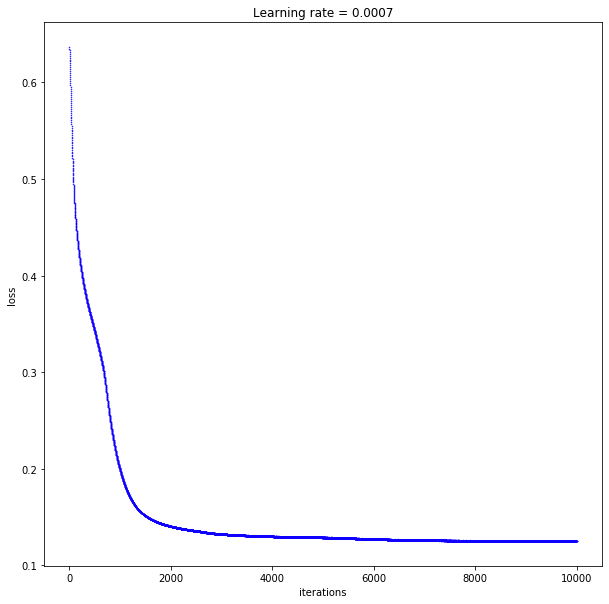

In [15]:
loss = model__.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0007')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

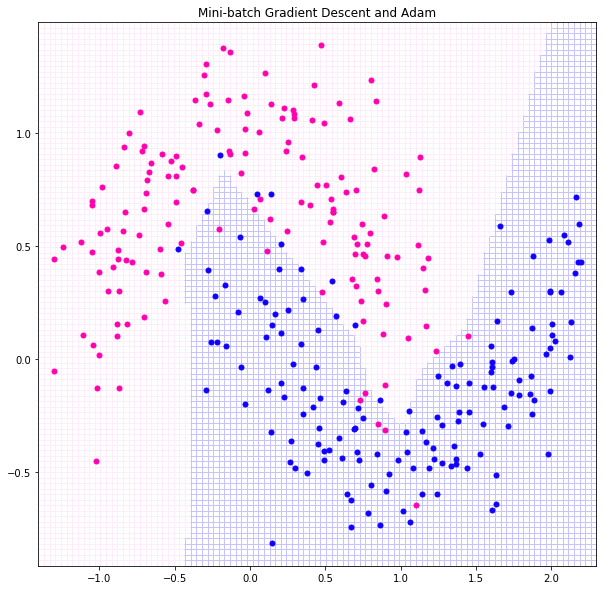

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Mini-batch Gradient Descent and Adam') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model__.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')